# **DRIVE MOUNTING**

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')


Mounted at /content/drive


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
AVAILABLE CSV FILES: ['raw_hourly_sensor_dataset.csv', 'sensor_dataset.csv', 'hourly_sensor_dataset.csv']

FEATURES IN THE CSV FILE:
['timestamp', 'cycle', 'health_index', 'temp_body', 'temp_shaft', 'current', 'vibration_x', 'vibration_y', 'vibration_z', 'vibration_magnitude', 'date', 'day_of_week', 'hour', 'rul']

Final features after dropping and keeping specific columns:
Dataset 2:  ['timestamp', 'temp_body', 'temp_shaft', 'current', 'vibration_magnitude']

✅ Hourly Sensor Dataset Shape: (70000, 7)


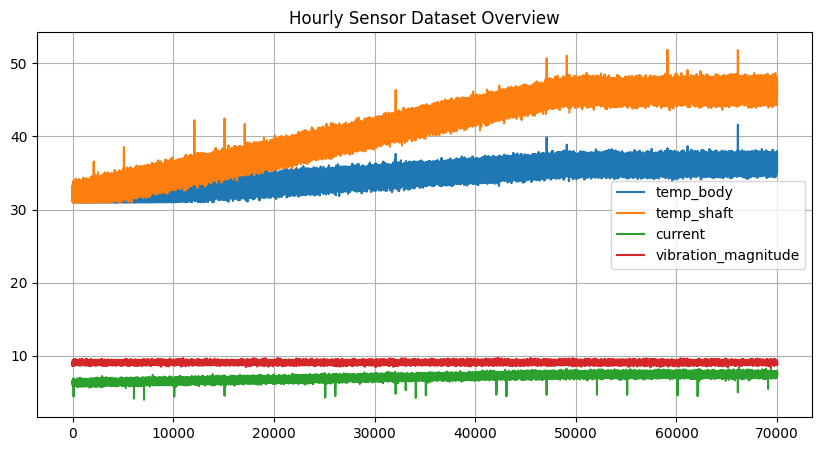

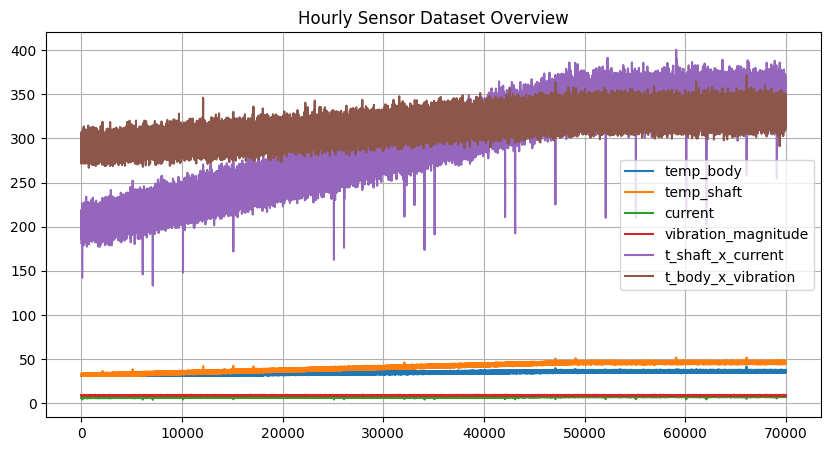

In [ ]:
import os
import numpy as np
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

drive.mount('/content/drive')
folder_path = "/content/drive/MyDrive/FYP/FYP-WF-7/1-RAW_HOURLY_DATA/"

# List all CSV files in the folder
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
print("AVAILABLE CSV FILES:", csv_files)

csv_file = os.path.join(folder_path, "raw_hourly_sensor_dataset.csv")
df = pd.read_csv(csv_file)

print("\nFEATURES IN THE CSV FILE:")
print(df.columns.tolist())
print("=======================================================================\n")

drop_col_set_2 = ['cycle', 'health_index', 'vibration_x', 'vibration_y', 'vibration_z', 'rul']
df_2 = df.drop(columns=drop_col_set_2)

keep_col_set_2 = ['timestamp', 'temp_body', 'temp_shaft', 'current', 'vibration_magnitude']
df_2 = df[keep_col_set_2]

print("Final features after dropping and keeping specific columns:")
print("Dataset 2: ", df_2.columns.tolist())
print("=======================================================================\n")

df_3 = df_2.copy()
# Create 2 new features called "'temp_shaft' × 'current'" and "'temp_body' × 'vibration_magnitude'"
# Print the new shape
df_3['t_shaft_x_current'] = df_3['temp_shaft'] * df_3['current']
df_3['t_body_x_vibration'] = df_3['temp_body'] * df_3['vibration_magnitude']

print("✅ Hourly Sensor Dataset Shape:", df_3.shape)

df_2.plot(figsize=(10,5))
plt.title("Hourly Sensor Dataset Overview")
plt.grid(True)
plt.show()

print("=======================================================================\n")

df_3.plot(figsize=(10,5))
plt.title("Hourly Sensor Dataset Overview")
plt.grid(True)
plt.show()

# **HOURLY-SENSOR-DATASET RESTRUCTURING**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
import pandas as pd
import os

folder_path = "/content/drive/MyDrive/FYP/FYP-WF-7/1-RAW_HOURLY_DATA/"

# List all CSV files in the folder (optional, to confirm)
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
print("AVAILABLE CSV FILES:", csv_files)

csv_file = os.path.join(folder_path, "raw_hourly_sensor_dataset.csv")
df = pd.read_csv(csv_file)

print("\nFEATURES IN THE CSV FILE:")
print(df.columns.tolist())

AVAILABLE CSV FILES: ['raw_hourly_sensor_dataset.csv']

FEATURES IN THE CSV FILE:
['timestamp', 'cycle', 'health_index', 'temp_body', 'temp_shaft', 'current', 'vibration_x', 'vibration_y', 'vibration_z', 'vibration_magnitude', 'date', 'day_of_week', 'hour', 'rul']


In [ ]:
drop_col_set_1 = ['cycle', 'health_index', 'vibration_magnitude', 'rul']
drop_col_set_2 = ['cycle', 'health_index', 'vibration_x', 'vibration_y', 'vibration_z', 'rul']
df_1 = df.drop(columns=drop_col_set_1)
df_2 = df.drop(columns=drop_col_set_2)

keep_col_set_1 = ['timestamp', 'temp_body', 'temp_shaft', 'current', 'vibration_x', 'vibration_y', 'vibration_z']
keep_col_set_2 = ['timestamp', 'temp_body', 'temp_shaft', 'current', 'vibration_magnitude']
df_1 = df[keep_col_set_1]
df_2 = df[keep_col_set_2]

print("Final features after dropping and keeping specific columns:")
print("Dataset 1: ", df_1.columns.tolist())
print("Dataset 2: ", df_2.columns.tolist())
# df_1.head()
# df_2.head()

output_file_1 = os.path.join(folder_path, "sensor_dataset.csv")
output_file_2 = os.path.join(folder_path, "hourly_sensor_dataset.csv")
df_1.to_csv(output_file_1, index=False)
df_2.to_csv(output_file_2, index=False)
print(f"✅ FILES SAVED AT: {folder_path}")


Final features after dropping and keeping specific columns:
Dataset 1:  ['timestamp', 'temp_body', 'temp_shaft', 'current', 'vibration_x', 'vibration_y', 'vibration_z']
Dataset 2:  ['timestamp', 'temp_body', 'temp_shaft', 'current', 'vibration_magnitude']
✅ FILES SAVED AT: /content/drive/MyDrive/FYP/FYP-WF-7/1-RAW_HOURLY_DATA/


# **DATA PRE-PROCESSING**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler


✅ Hourly Sensor Dataset Loaded | Shape: (70000, 5)


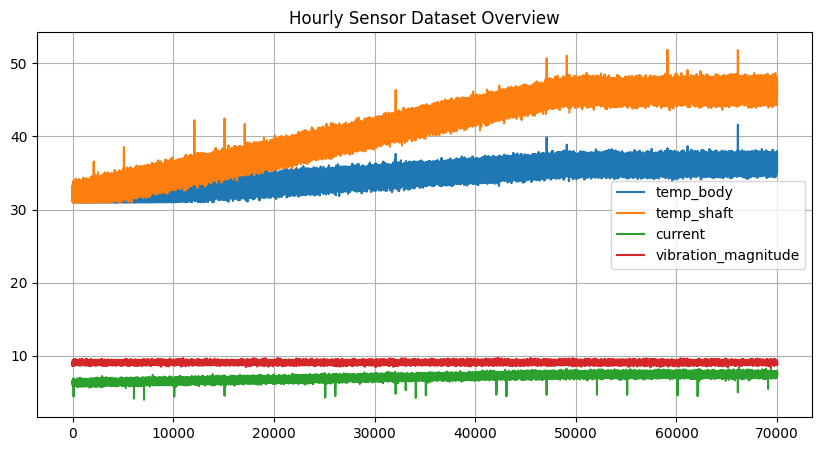

In [ ]:
raw_data_path = "/content/drive/MyDrive/FYP/FYP-WF-7/1-RAW_HOURLY_DATA/hourly_sensor_dataset.csv"
save_dir = "/content/drive/MyDrive/FYP/FYP-WF-7/2-PREPROCESSED_DATA/"
os.makedirs(save_dir, exist_ok=True)

df_raw = pd.read_csv(raw_data_path)
print("✅ Hourly Sensor Dataset Loaded | Shape:", df_raw.shape)
# df_raw.to_csv(os.path.join(save_dir, "01_Raw_Dataset.csv"), index=False)

df_raw.plot(figsize=(10,5))
plt.title("Hourly Sensor Dataset Overview")
plt.grid(True)
plt.show()


In [ ]:
missing_values_per_column = df_raw.isnull().sum()
total_missing_values = missing_values_per_column.sum()

print("Missing values per column:")
print(missing_values_per_column)
print("\nTotal missing values in DataFrame:", total_missing_values)

# Detect missing data
missing_vals = df_raw.isnull().sum()
print("Missing values before handling:")
print(missing_vals)

# Impute numeric columns with forward fill, then with mean if any remain
df_raw.fillna(method='ffill', inplace=True)
for col in df_raw.select_dtypes(include=[np.number]).columns:
    if df_raw[col].isnull().any():
        df_raw[col].fillna(df_raw[col].mean(), inplace=True)

# Verify no NaNs remain
print("Missing values after handling:")
print(df_raw.isnull().sum())


Missing values per column:
timestamp                0
temp_body                0
temp_shaft             140
current                  0
vibration_magnitude      0
dtype: int64

Total missing values in DataFrame: 140
Missing values before handling:
timestamp                0
temp_body                0
temp_shaft             140
current                  0
vibration_magnitude      0
dtype: int64
Missing values after handling:
timestamp              0
temp_body              0
temp_shaft             0
current                0
vibration_magnitude    0
dtype: int64


/tmp/ipython-input-3362109687.py:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_raw.fillna(method='ffill', inplace=True)


✅ Outliers handled | Shape: (70000, 5)


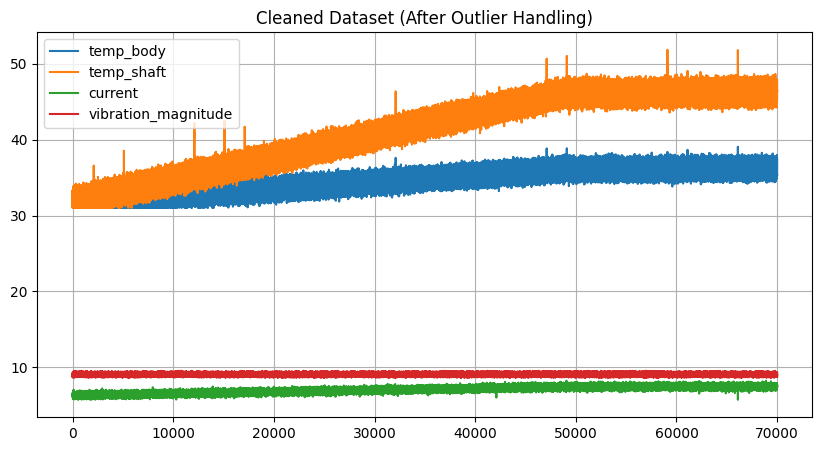

In [ ]:
# Simple Z-Score Clipping
df_clean = df_raw.copy()
z_threshold = 3
for col in df_clean.select_dtypes(include=[np.number]).columns:
    col_mean = df_clean[col].mean()
    col_std = df_clean[col].std()
    z_scores = (df_clean[col] - col_mean) / col_std
    df_clean[col] = np.where(np.abs(z_scores) > z_threshold, col_mean, df_clean[col])

print("✅ Outliers handled | Shape:", df_clean.shape)
df_clean.to_csv(os.path.join(save_dir, "Cleaned_Hourly_Dataset.csv"), index=False)

df_clean.plot(figsize=(10,5))
plt.title("Cleaned Dataset (After Outlier Handling)")
plt.grid(True)
plt.show()


✅ Train: (52500, 5), Val: (10500, 5), Test: (7000, 5)


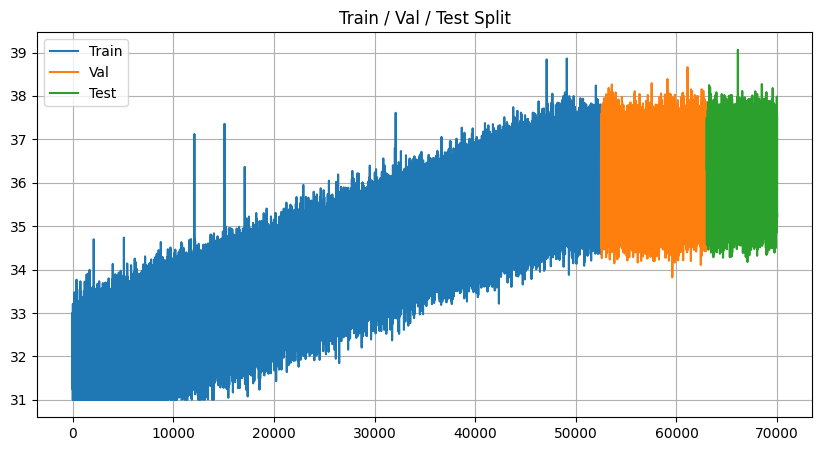

In [ ]:
n = len(df_clean)
train_end = int(n * 0.75)
val_end = int(n * 0.90)
df_train = df_clean.iloc[:train_end]
df_val = df_clean.iloc[train_end:val_end]
df_test = df_clean.iloc[val_end:]

print(f"✅ Train: {df_train.shape}, Val: {df_val.shape}, Test: {df_test.shape}")
df_train.to_csv(os.path.join(save_dir, "08_Train.csv"), index=False)
df_val.to_csv(os.path.join(save_dir, "08_Val.csv"), index=False)
df_test.to_csv(os.path.join(save_dir, "08_Test.csv"), index=False)

plt.figure(figsize=(10,5))
plt.plot(df_train.index, df_train.iloc[:,1], label="Train")
plt.plot(df_val.index, df_val.iloc[:,1], label="Val")
plt.plot(df_test.index, df_test.iloc[:,1], label="Test")
plt.title("Train / Val / Test Split")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Check for zero variance columns before scaling
num_cols = df_train.select_dtypes(include=[np.number]).columns
for col in num_cols:
    col_min = df_train[col].min()
    col_max = df_train[col].max()
    if col_min == col_max:
        print(f"Warning: Column {col} has zero variance (min == max == {col_min}). Skipping or imputing this column.")
        # You can choose to drop or fill this column, for example:
        # df_train[col] = 0
        # Or drop this column from training/scaling

# Proceed with scaling on valid columns only
valid_cols = [col for col in num_cols if df_train[col].min() != df_train[col].max()]
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train = scaler.fit_transform(df_train[valid_cols])

# Save scaler and scaled data as before
...


Ellipsis

✅ Scaled Train Shape: (52500, 4)
✅ Scaler saved
✅ Scaled Val/Test Shapes: (10500, 4) (7000, 4)


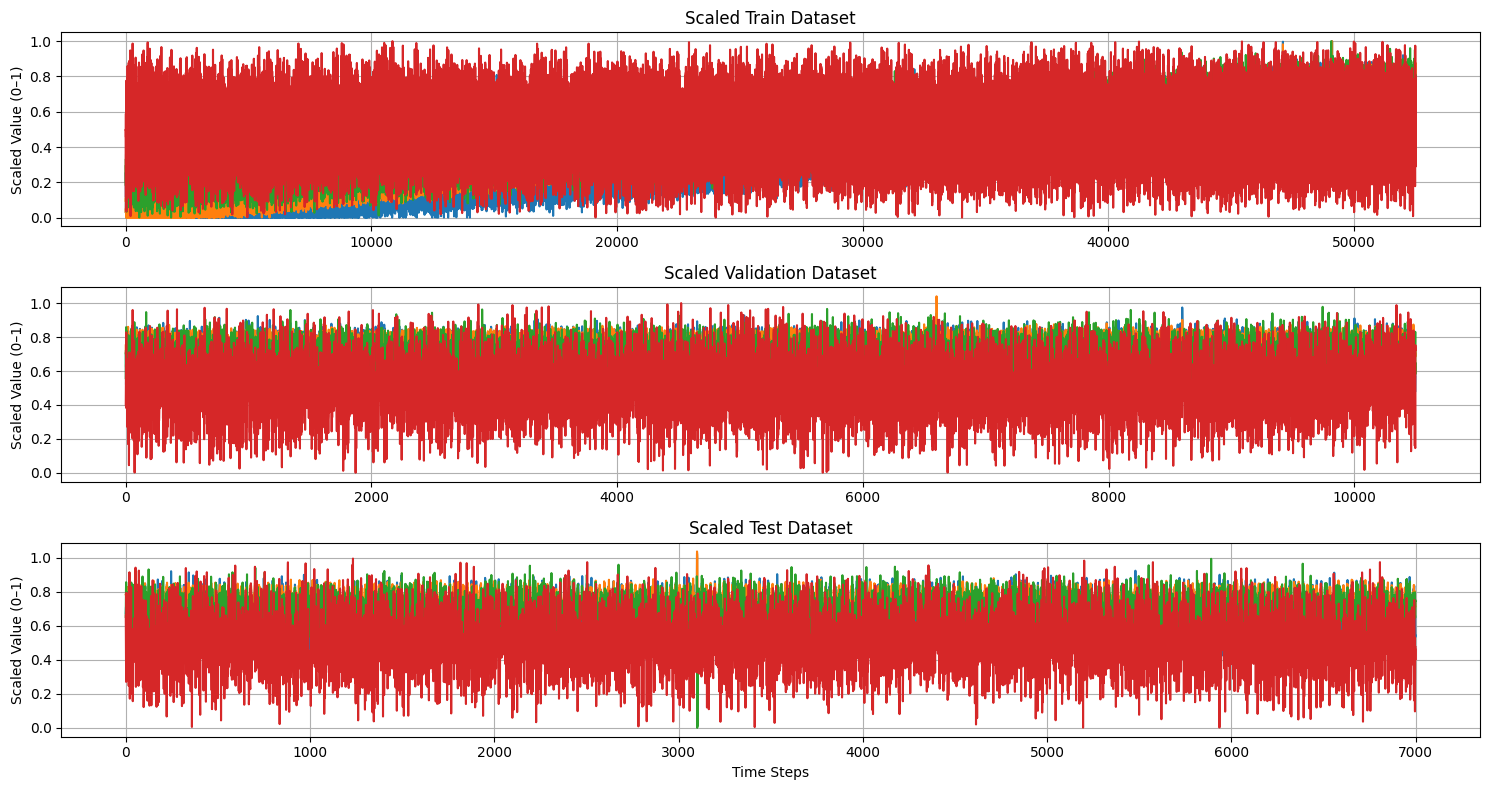

In [ ]:
# Scale Train Dataset
# scaler = StandardScaler()
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train = scaler.fit_transform(df_train.select_dtypes(include=[np.number]))
np.save(os.path.join(save_dir, "Scaled_Train.npy"), scaled_train)
print("✅ Scaled Train Shape:", scaled_train.shape)

# Save scaler for future use
import pickle
with open(os.path.join(save_dir, "MinMax_Scaler.pkl"), "wb") as f:
    pickle.dump(scaler, f)
print("✅ Scaler saved")

# Scale Val/Test using same scaler
scaled_val = scaler.transform(df_val.select_dtypes(include=[np.number]))
scaled_test = scaler.transform(df_test.select_dtypes(include=[np.number]))
np.save(os.path.join(save_dir, "Scaled_Val.npy"), scaled_val)
np.save(os.path.join(save_dir, "Scaled_Test.npy"), scaled_test)
print("✅ Scaled Val/Test Shapes:", scaled_val.shape, scaled_test.shape)

plt.figure(figsize=(15, 8))

plt.subplot(3, 1, 1)
plt.plot(scaled_train)
plt.title("Scaled Train Dataset")
plt.ylabel("Scaled Value (0–1)")
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(scaled_val)
plt.title("Scaled Validation Dataset")
plt.ylabel("Scaled Value (0–1)")
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(scaled_test)
plt.title("Scaled Test Dataset")
plt.ylabel("Scaled Value (0–1)")
plt.xlabel("Time Steps")
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
# Window Creation
lookback = 1200   # 50 days
horizon = 240     # 10 days
window_size = lookback + horizon

def create_windows(data, lookback, horizon):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+lookback])
        y.append(data[i+lookback:i+lookback+horizon])
    return np.array(X), np.array(y)

X_train, y_train = create_windows(scaled_train, lookback, horizon)
X_val, y_val = create_windows(scaled_val, lookback, horizon)
X_test, y_test = create_windows(scaled_test, lookback, horizon)

np.save(os.path.join(save_dir, "X_train.npy"), X_train)
np.save(os.path.join(save_dir, "y_train.npy"), y_train)
np.save(os.path.join(save_dir, "X_val.npy"), X_val)
np.save(os.path.join(save_dir, "y_val.npy"), y_val)
np.save(os.path.join(save_dir, "X_test.npy"), X_test)
np.save(os.path.join(save_dir, "y_test.npy"), y_test)
print("✅ Windows Saved | Shapes:")
print("X_train:", X_train.shape, "y_train:", y_train.shape)
print("X_val  :", X_val.shape, "y_val    :", y_val.shape)
print("X_test :", X_test.shape, "y_test  :", y_test.shape)


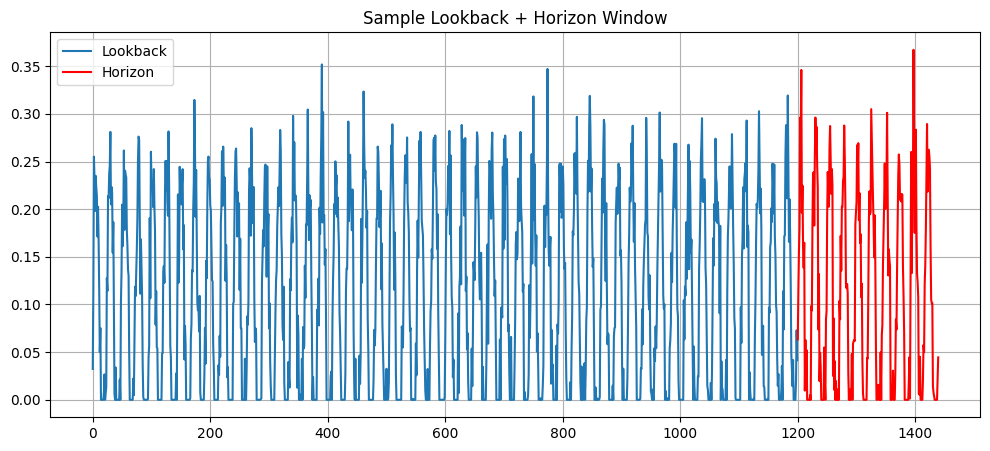

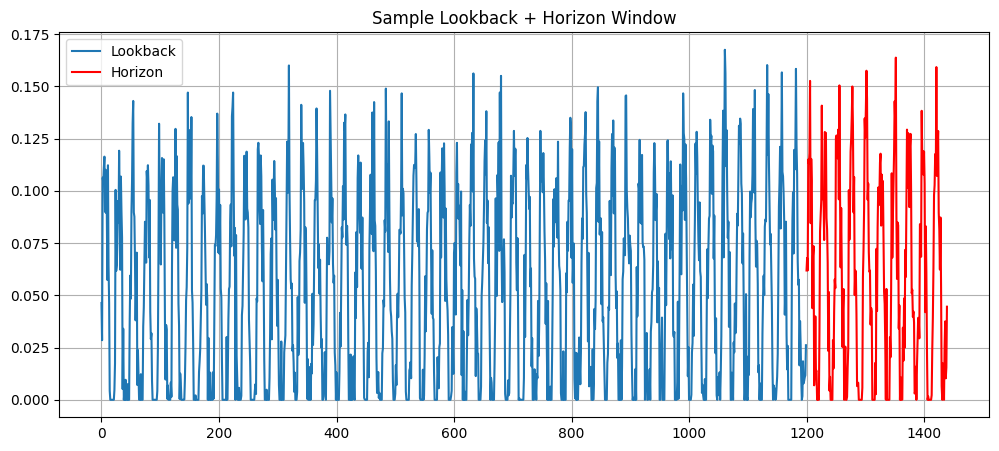

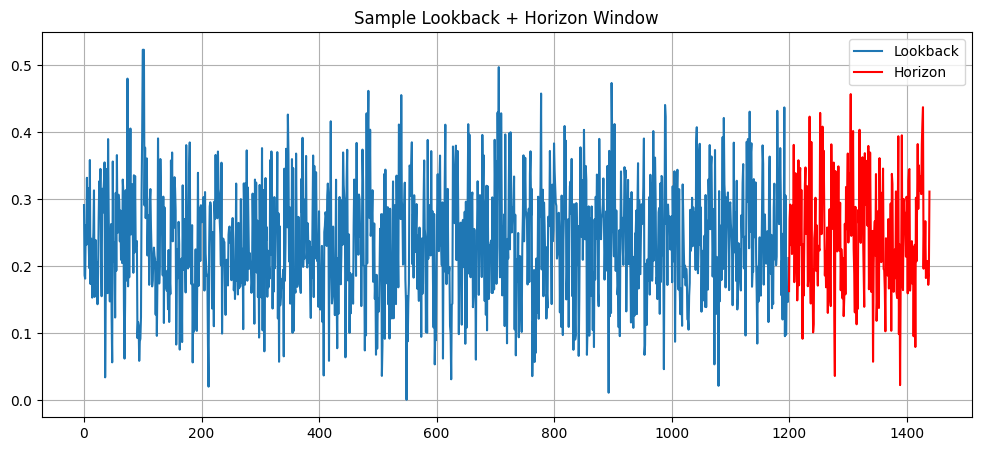

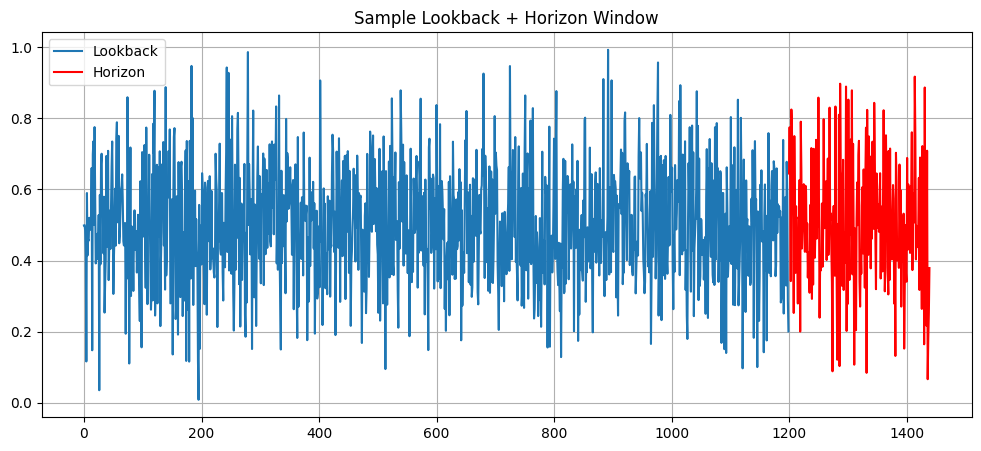

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(X_train[0][:,0], label="Lookback")
plt.plot(np.arange(lookback, lookback+horizon), y_train[0][:,0], label="Horizon", color='red')
plt.title("Sample Lookback + Horizon Window")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12,5))
plt.plot(X_train[0][:,1], label="Lookback")
plt.plot(np.arange(lookback, lookback+horizon), y_train[0][:,1], label="Horizon", color='red')
plt.title("Sample Lookback + Horizon Window")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12,5))
plt.plot(X_train[0][:,2], label="Lookback")
plt.plot(np.arange(lookback, lookback+horizon), y_train[0][:,2], label="Horizon", color='red')
plt.title("Sample Lookback + Horizon Window")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12,5))
plt.plot(X_train[0][:,3], label="Lookback")
plt.plot(np.arange(lookback, lookback+horizon), y_train[0][:,3], label="Horizon", color='red')
plt.title("Sample Lookback + Horizon Window")
plt.legend()
plt.grid(True)
plt.show()

### **Scaler Verification**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

raw_data_path = "/content/drive/MyDrive/FYP/FYP-WF-7/1-RAW_HOURLY_DATA/hourly_sensor_dataset.csv"
save_dir = "/content/drive/MyDrive/FYP/FYP-WF-7/2-PREPROCESSED_DATA/"
os.makedirs(save_dir, exist_ok=True)

df_raw = pd.read_csv(raw_data_path)
print("✅ Hourly Sensor Dataset Loaded | Shape:", df_raw.shape)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Hourly Sensor Dataset Loaded | Shape: (70000, 5)


In [ ]:
df_clean = df_raw.copy()

n = len(df_clean)
train_end = int(n * 0.75)
val_end = int(n * 0.90)
df_train = df_clean.iloc[:train_end]
df_val = df_clean.iloc[train_end:val_end]
df_test = df_clean.iloc[val_end:]
# Print first 5 rows of original training data (numeric features only)
print("Original Train Data Sample:")
print(df_train.select_dtypes(include=[np.number]).head())


# Load Phase-1 Artifacts
base_path = '/content/drive/MyDrive/FYP/FYP-WF-7/2-PREPROCESSED_DATA/'
with open(base_path + 'MinMax_Scaler.pkl', 'rb') as f:
    scalers = pickle.load(f)

scaled_train = scalers.transform(df_train.select_dtypes(include=[np.number]))
# Print first 5 rows of scaled training data
print("\nScaled Train Data Sample:")
print(scaled_train[:5, :])

# Print min and max per feature before scaling
print("\nOriginal Train Data min per feature:")
print(df_train.select_dtypes(include=[np.number]).min())

print("\nOriginal Train Data max per feature:")
print(df_train.select_dtypes(include=[np.number]).max())

# Print min and max per feature after scaling (expected to be 0 and 1)
print("\nScaled Train Data min per feature:")
print(scaled_train.min(axis=0))

print("\nScaled Train Data max per feature:")
print(scaled_train.max(axis=0))


Original Train Data Sample:
   temp_body  temp_shaft   current  vibration_magnitude
0  31.254189   31.928061  6.452382             9.074526
1  31.897346   31.571387  6.187040             8.591307
2  33.006279   33.130092  6.175155             9.061537
3  32.822993   33.082192  6.376528             8.993308
4  32.557745   33.225969  6.301966             8.716181

Scaled Train Data Sample:
[[ 0.03232402  0.0463042   0.29133999  0.49886077]
 [ 0.11411147  0.02850847  0.18616674 -0.01722882]
 [ 0.2551295   0.10627773  0.1814559   0.48498886]
 [ 0.23182186  0.10388782  0.26127408  0.41211845]
 [ 0.19809145  0.11106137  0.2317199   0.1161394 ]]

Original Train Data min per feature:
temp_body              31.000000
temp_shaft             31.000000
current                 3.974019
vibration_magnitude     8.421617
dtype: float64

Original Train Data max per feature:
temp_body              39.863236
temp_shaft             51.042696
current                 8.240258
vibration_magnitude     9.69754

# **FORECASTING MODEL**

### **Multivariate PatchTST - Vanilla**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Setup Environment
!pip install -q transformers accelerate datasets scikit-learn

In [ ]:
import numpy as np
import torch
from torch.utils.data import TensorDataset, DataLoader
from transformers import PatchTSTConfig, PatchTSTForPrediction, Trainer, TrainingArguments
from peft import get_peft_model, LoraConfig, TaskType
import pickle
import os

# Load Phase-1 Artifacts
base_path = '/content/drive/MyDrive/FYP/FYP-WF-7/2-PREPROCESSED_DATA/'
X_train = np.load(base_path + 'X_train.npy')
y_train = np.load(base_path + 'y_train.npy')
X_val = np.load(base_path + 'X_val.npy')
y_val = np.load(base_path + 'y_val.npy')
X_test = np.load(base_path + 'X_test.npy')
y_test = np.load(base_path + 'y_test.npy')

# with open(base_path + 'MinMax_Scaler.pkl', 'rb') as f:
#     scalers = pickle.load(f)

In [ ]:
# print("=== NaN CHECK OF LOADED DATASETS ===")
# print(f"X_train NaN: {np.isnan(X_train).any()} | Count: {np.isnan(X_train).sum()}")
# print(f"y_train NaN: {np.isnan(y_train).any()} | Count: {np.isnan(y_train).sum()}")
# print(f"X_val NaN: {np.isnan(X_val).any()} | Count: {np.isnan(X_val).sum()}")
# print(f"y_val NaN: {np.isnan(y_val).any()} | Count: {np.isnan(y_val).sum()}")
# print(f"X_test NaN: {np.isnan(X_test).any()} | Count: {np.isnan(X_test).sum()}")
# print(f"y_test NaN: {np.isnan(y_test).any()} | Count: {np.isnan(y_test).sum()}")

# print("=== NaN CHECK WITH PERCENTAGES ===")
# datasets = ['X_train', 'y_train', 'X_val', 'y_val', 'X_test', 'y_test']
# for name in datasets:
#     data = globals()[name]
#     total_elements = data.size
#     nan_count = np.isnan(data).sum()
#     nan_percentage = (nan_count / total_elements) * 100
#     print(f"{name}: {nan_count:,} / {total_elements:,} ({nan_percentage:.2f}%)")

print("=== NaN COUNT BY FEATURE ===")
datasets = ['X_train', 'y_train', 'X_val', 'y_val', 'X_test', 'y_test']
for name in datasets:
    data = globals()[name]
    print(f"\n{name} (shape: {data.shape}):")
    for feature in range(data.shape[2]):
        feature_data = data[:, :, feature]
        nan_count = np.isnan(feature_data).sum()
        non_nan_count = np.sum(~np.isnan(feature_data))
        total_elements = feature_data.size
        percentage = (nan_count / total_elements) * 100
        print(f"  Feature {feature}: {nan_count:,} NaNs, {non_nan_count:,} non-NaNs, {total_elements:,} total ({percentage:.2f}%)")

=== NaN COUNT BY FEATURE ===

X_train (shape: (51060, 1200, 4)):
  Feature 0: 0 NaNs, 61,272,000 non-NaNs, 61,272,000 total (0.00%)
  Feature 1: 0 NaNs, 61,272,000 non-NaNs, 61,272,000 total (0.00%)
  Feature 2: 0 NaNs, 61,272,000 non-NaNs, 61,272,000 total (0.00%)
  Feature 3: 0 NaNs, 61,272,000 non-NaNs, 61,272,000 total (0.00%)

y_train (shape: (51060, 240, 4)):
  Feature 0: 0 NaNs, 12,254,400 non-NaNs, 12,254,400 total (0.00%)
  Feature 1: 0 NaNs, 12,254,400 non-NaNs, 12,254,400 total (0.00%)
  Feature 2: 0 NaNs, 12,254,400 non-NaNs, 12,254,400 total (0.00%)
  Feature 3: 0 NaNs, 12,254,400 non-NaNs, 12,254,400 total (0.00%)

X_val (shape: (9060, 1200, 4)):
  Feature 0: 0 NaNs, 10,872,000 non-NaNs, 10,872,000 total (0.00%)
  Feature 1: 0 NaNs, 10,872,000 non-NaNs, 10,872,000 total (0.00%)
  Feature 2: 0 NaNs, 10,872,000 non-NaNs, 10,872,000 total (0.00%)
  Feature 3: 0 NaNs, 10,872,000 non-NaNs, 10,872,000 total (0.00%)

y_val (shape: (9060, 240, 4)):
  Feature 0: 0 NaNs, 2,174,400 

In [ ]:
feature_0_mean = np.nanmean(X_train[:, :, 0])
feature_1_mean = np.nanmean(X_train[:, :, 1])
feature_2_mean = np.nanmean(X_train[:, :, 2])
feature_3_mean = np.nanmean(X_train[:, :, 3])
print(f"Feature 0 mean: {feature_0_mean}")
print(f"Feature 1 mean: {feature_1_mean}")
print(f"Feature 2 mean: {feature_2_mean}")
print(f"Feature 3 mean: {feature_3_mean}")


Feature 0 mean: 0.3878688219876109
Feature 1 mean: 0.4196520562422236
Feature 2 mean: 0.46906102314389236
Feature 3 mean: 0.4993276440725453


In [ ]:
# # Option 1: Replace NaNs and Infs with 0

# X_train = np.nan_to_num(X_train, nan=0.0, posinf=0.0, neginf=0.0)
# y_train = np.nan_to_num(y_train, nan=0.0, posinf=0.0, neginf=0.0)
# X_val = np.nan_to_num(X_val, nan=0.0, posinf=0.0, neginf=0.0)
# y_val = np.nan_to_num(y_val, nan=0.0, posinf=0.0, neginf=0.0)
# X_test = np.nan_to_num(X_test, nan=0.0, posinf=0.0, neginf=0.0)
# y_test = np.nan_to_num(y_test, nan=0.0, posinf=0.0, neginf=0.0)
# print("✅ NaNs and Infs replaced with 0 in all datasets")


# Option 2: Replace with feature mean

X_train[:, :, 1] = np.nan_to_num(X_train[:, :, 1], nan=feature_1_mean)
y_train[:, :, 1] = np.nan_to_num(y_train[:, :, 1], nan=feature_1_mean)
X_val[:, :, 1] = np.nan_to_num(X_val[:, :, 1], nan=feature_1_mean)
y_val[:, :, 1] = np.nan_to_num(y_val[:, :, 1], nan=feature_1_mean)
X_test[:, :, 1] = np.nan_to_num(X_test[:, :, 1], nan=feature_1_mean)
y_test[:, :, 1] = np.nan_to_num(y_test[:, :, 1], nan=feature_1_mean)

print("✅ NaNs in Feature 1 replaced with feature mean")

✅ NaNs in Feature 1 replaced with feature mean


In [ ]:
print("=== NaN COUNT BY FEATURE ===")
datasets = ['X_train', 'y_train', 'X_val', 'y_val', 'X_test', 'y_test']
for name in datasets:
    data = globals()[name]
    print(f"\n{name} (shape: {data.shape}):")
    for feature in range(data.shape[2]):
        feature_data = data[:, :, feature]
        nan_count = np.isnan(feature_data).sum()
        non_nan_count = np.sum(~np.isnan(feature_data))
        total_elements = feature_data.size
        percentage = (nan_count / total_elements) * 100
        print(f"  Feature {feature}: {nan_count:,} NaNs, {non_nan_count:,} non-NaNs, {total_elements:,} total ({percentage:.2f}%)")

=== NaN COUNT BY FEATURE ===

X_train (shape: (51060, 1200, 4)):
  Feature 0: 0 NaNs, 61,272,000 non-NaNs, 61,272,000 total (0.00%)
  Feature 1: 0 NaNs, 61,272,000 non-NaNs, 61,272,000 total (0.00%)
  Feature 2: 0 NaNs, 61,272,000 non-NaNs, 61,272,000 total (0.00%)
  Feature 3: 0 NaNs, 61,272,000 non-NaNs, 61,272,000 total (0.00%)

y_train (shape: (51060, 240, 4)):
  Feature 0: 0 NaNs, 12,254,400 non-NaNs, 12,254,400 total (0.00%)
  Feature 1: 0 NaNs, 12,254,400 non-NaNs, 12,254,400 total (0.00%)
  Feature 2: 0 NaNs, 12,254,400 non-NaNs, 12,254,400 total (0.00%)
  Feature 3: 0 NaNs, 12,254,400 non-NaNs, 12,254,400 total (0.00%)

X_val (shape: (9060, 1200, 4)):
  Feature 0: 0 NaNs, 10,872,000 non-NaNs, 10,872,000 total (0.00%)
  Feature 1: 0 NaNs, 10,872,000 non-NaNs, 10,872,000 total (0.00%)
  Feature 2: 0 NaNs, 10,872,000 non-NaNs, 10,872,000 total (0.00%)
  Feature 3: 0 NaNs, 10,872,000 non-NaNs, 10,872,000 total (0.00%)

y_val (shape: (9060, 240, 4)):
  Feature 0: 0 NaNs, 2,174,400 

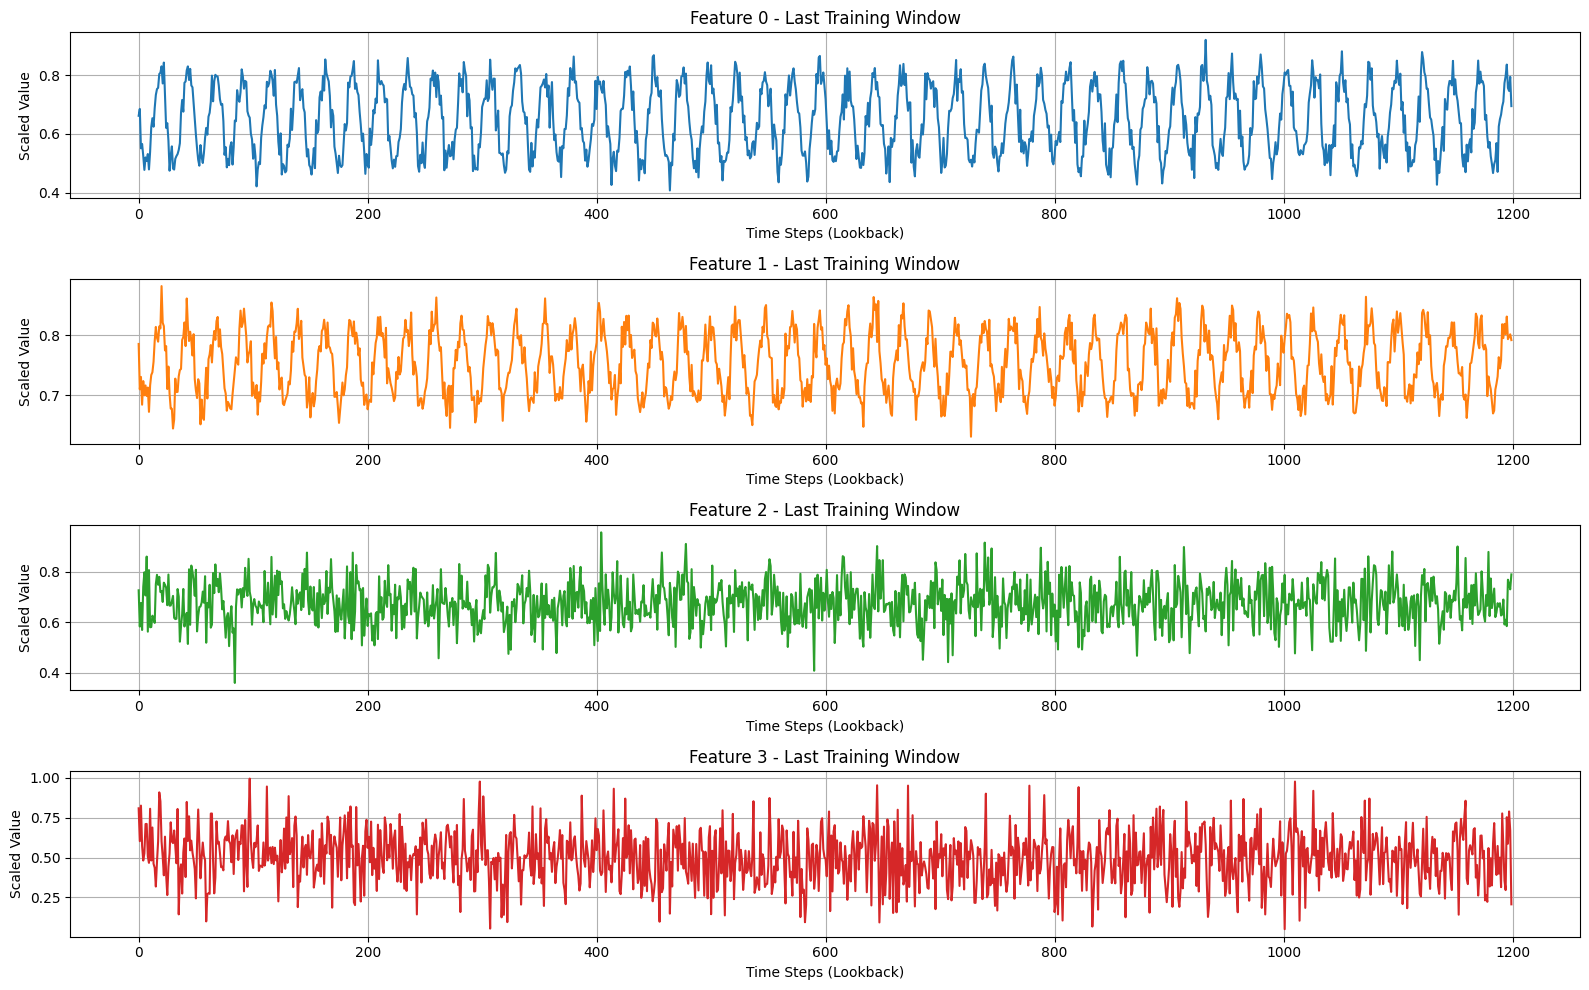

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

last_window = X_train[-1]
num_features = last_window.shape[1]

plt.figure(figsize=(16, 10))
for i in range(num_features):
    plt.subplot(num_features, 1, i + 1)
    plt.plot(last_window[:, i], color=f'C{i}')
    plt.title(f'Feature {i} - Last Training Window')
    plt.xlabel('Time Steps (Lookback)')
    plt.ylabel('Scaled Value')
    plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32)

# Wrap into TensorDatasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)


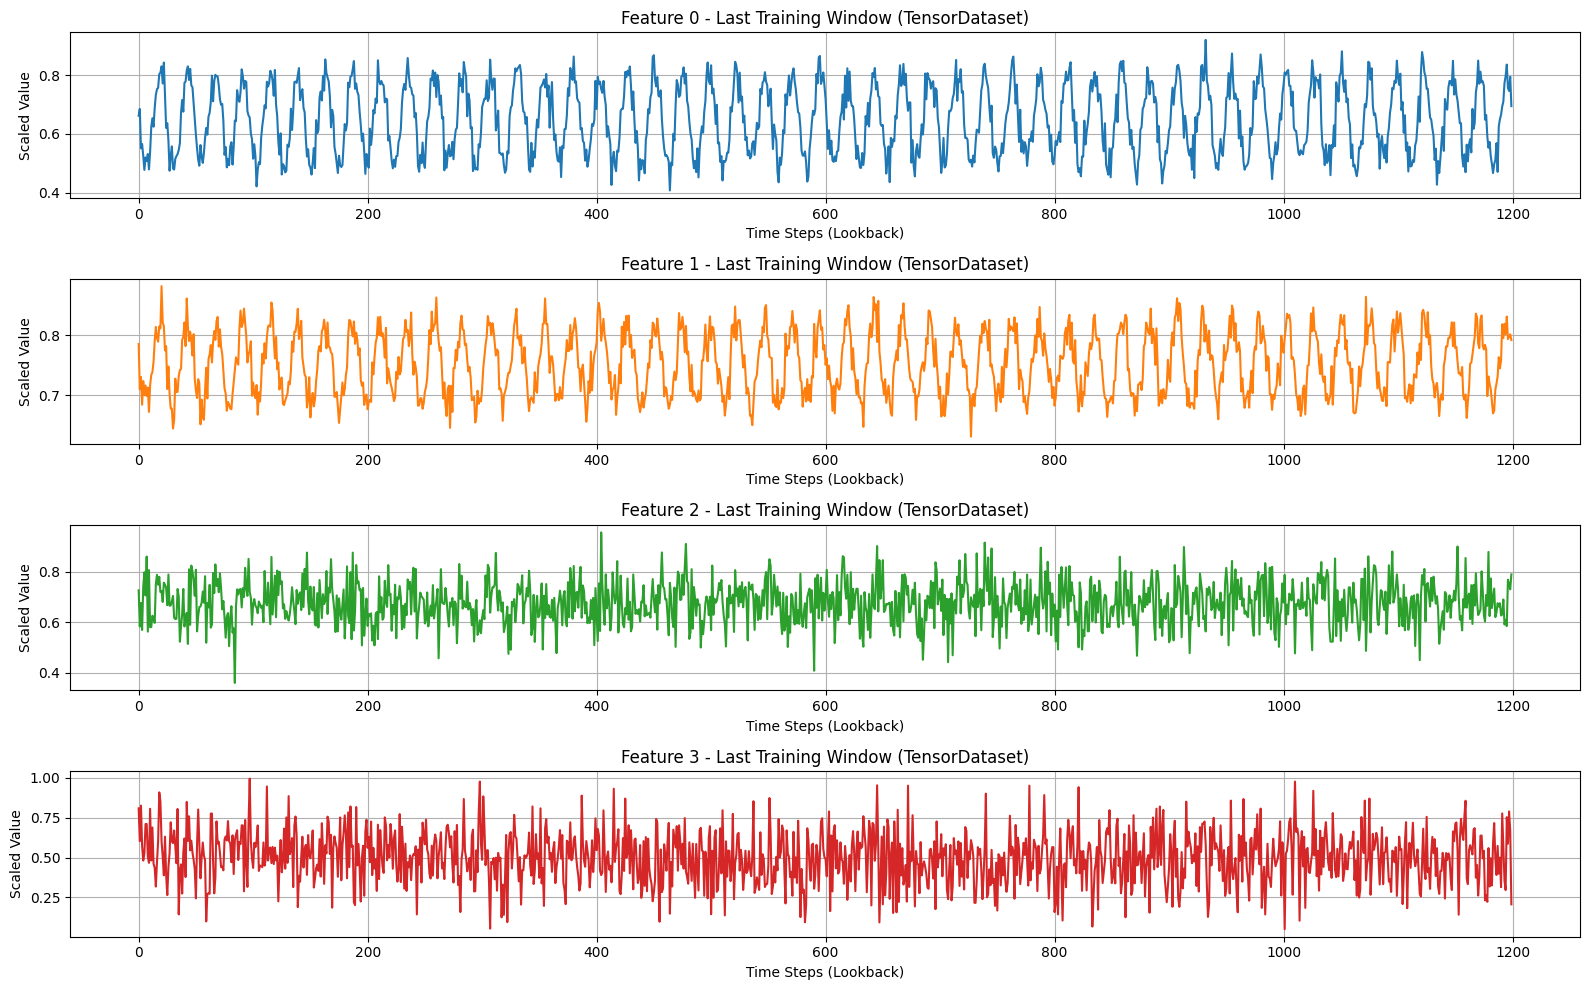

In [ ]:
import matplotlib.pyplot as plt

last_window_tensor, _ = train_dataset[-1]
last_window = last_window_tensor.numpy()
num_features = last_window.shape[1]

plt.figure(figsize=(16, 10))
for i in range(num_features):
    plt.subplot(num_features, 1, i + 1)
    plt.plot(last_window[:, i], color=f'C{i}')
    plt.title(f'Feature {i} - Last Training Window (TensorDataset)')
    plt.xlabel('Time Steps (Lookback)')
    plt.ylabel('Scaled Value')
    plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
# Define PatchTST Configuration (Vanilla, No LoRA)
config = PatchTSTConfig(
    context_length=1200,
    prediction_length=240,
    num_attention_heads=4,
    num_input_channels=4,
    num_targets=4,
    num_hidden_layers=2,
    patch_length=12,
    patch_stride=3,
    d_model=256,
    ffn_dim=512,
    dropout=0.1,
    loss="mse",
    scaling=None,
    # activation_function='gelu'
)
model = PatchTSTForPrediction(config)


In [ ]:
# print("WARNING: Manually initializing all model parameters to zero.")
# with torch.no_grad():
#     for name, param in model.named_parameters():
#         param.data.fill_(0.0)
#         print(f"Set parameter {name} to zero.")
# print("All model parameters have been set to zero.")


In [ ]:
# Create directory for VANILLA model artifacts
vanilla_dir = '/content/drive/MyDrive/FYP/FYP-WF-7/3-Models/2-PatchTSTs/SET-1/VANILLA/'
os.makedirs(vanilla_dir, exist_ok=True)


In [ ]:
print("Train input range:", X_train_tensor.min().item(), X_train_tensor.max().item())
print("Train label range:", y_train_tensor.min().item(), y_train_tensor.max().item())
print("Any NaNs in X_train?", torch.isnan(X_train_tensor).any().item())
print("Any NaNs in y_train?", torch.isnan(y_train_tensor).any().item())


Train input range: 0.0 1.0
Train label range: 0.0 1.0
Any NaNs in X_train? False
Any NaNs in y_train? False


In [ ]:
from torch.optim import AdamW
import torch.nn as nn
from tqdm import tqdm

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f'Using device: {device}')
model.to(device)

# Prepare DataLoaders
batch_size = 128
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

# Define Loss and Optimizer
criterion = nn.MSELoss()
optimizer = AdamW(model.parameters(), lr=1e-5)

# print("=== FINAL NAN VERIFICATION IN DATA LOADERS ===")
# def check_loader_for_nans(loader, name):
#     has_nans = False
#     for batch_idx, (inputs, labels) in enumerate(loader):
#         if torch.isnan(inputs).any() or torch.isnan(labels).any():
#             has_nans = True
#             print(f"❌ {name} - Batch {batch_idx}: Input NaNs: {torch.isnan(inputs).any()}, Label NaNs: {torch.isnan(labels).any()}")
#             break
#     if not has_nans:
#         print(f"✅ {name}: No NaNs found")

# check_loader_for_nans(train_loader, "Train Loader")
# check_loader_for_nans(val_loader, "Val Loader")

# # Also check the original datasets after preprocessing
# print("\n=== DATASET NAN CHECK AFTER PREPROCESSING ===")
# datasets = ['X_train', 'y_train', 'X_val', 'y_val', 'X_test', 'y_test']
# for name in datasets:
#     data = globals()[name]
#     has_nan = np.isnan(data).any()
#     print(f"{name}: {'❌ Has NaNs' if has_nan else '✅ No NaNs'}")

Using device: cuda


In [ ]:
num_epochs = 20
best_val_loss = float('inf')

# Early Stopping Parameters
patience = 5
early_stop_counter = 0

model_save_path = os.path.join(vanilla_dir, 'model_best')
os.makedirs(model_save_path, exist_ok=True)


In [ ]:
# Training Loop
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    for inputs, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}"):
        inputs, labels = inputs.to(device), labels.to(device)
        if inputs.dim() == 2:
            inputs = inputs.unsqueeze(1)
        optimizer.zero_grad()
        outputs = model(past_values=inputs, future_values=labels)
        loss = outputs.loss
        if torch.isnan(loss):
            print("NaN loss detected!!!")
            # continue
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        # torch.nn.LayerNorm(model.config.d_model, eps=1e-5)
        optimizer.step()
        train_loss += loss.item()

    avg_train_loss = train_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    # Validation
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            if inputs.dim() == 2:
                inputs = inputs.unsqueeze(1)
            outputs = model(past_values=inputs, future_values=labels)
            # loss = outputs.loss
            # val_loss += loss.item()
            preds = outputs.prediction_outputs  # shape: [batch_size, prediction_length, num_targets]
            if preds is None:
                preds = outputs.logits  # fallback, depending on model version

            # Compute full loss for backward compatibility
            loss = criterion(preds, labels)
            val_loss += loss.item()

            # ---- NEW: Compute per-feature losses ----
            if 'feature_wise_val_loss' not in locals():
                feature_wise_val_loss = torch.zeros(preds.shape[-1], device=device)  # num_targets

            with torch.no_grad():
                mse_per_feature = ((preds - labels) ** 2).mean(dim=(0, 1))  # average over batch & seq length
                feature_wise_val_loss += mse_per_feature

    avg_val_loss = val_loss / len(val_loader)
    val_losses.append(avg_val_loss)
    # print(f"Epoch {epoch+1} | Train Loss: {avg_train_loss:.4f} | Val Loss: {avg_val_loss:.4f}")
    # Average feature-wise losses across all validation batches
    avg_feature_wise_val_loss = feature_wise_val_loss / len(val_loader)

    print(f"Epoch {epoch+1} | Train Loss: {avg_train_loss:.4f} | Val Loss: {avg_val_loss:.4f}")
    for i, f_loss in enumerate(avg_feature_wise_val_loss.tolist()):
        print(f"   └ Feature {i+1} Val Loss: {f_loss:.6f}")

    # Reset accumulator
    feature_wise_val_loss.zero_()

    # Save Best Model
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        model.save_pretrained(model_save_path)
        print("✅ Saved best model.")
        early_stop_counter = 0
    else:
        early_stop_counter += 1
        print(f"⚠️ Early Stop Counter: {early_stop_counter} epoch(s).")

    if early_stop_counter >= patience:
        print(f"🛑 No improvement for {patience} epochs).")
        break

# from transformers import AutoModel
# model = AutoModel.from_pretrained(model_save_path)


Epoch 1: 100%|██████████| 399/399 [06:12<00:00,  1.07it/s]


Epoch 1 | Train Loss: 0.0919 | Val Loss: 0.0137
✅ Saved best model.


Epoch 2: 100%|██████████| 399/399 [06:19<00:00,  1.05it/s]


Epoch 2 | Train Loss: 0.0127 | Val Loss: 0.0131
✅ Saved best model.


Epoch 3: 100%|██████████| 399/399 [06:19<00:00,  1.05it/s]


Epoch 3 | Train Loss: 0.0125 | Val Loss: 0.0130
✅ Saved best model.


Epoch 4: 100%|██████████| 399/399 [06:19<00:00,  1.05it/s]


Epoch 4 | Train Loss: 0.0125 | Val Loss: 0.0129
✅ Saved best model.


Epoch 5: 100%|██████████| 399/399 [06:20<00:00,  1.05it/s]


Epoch 5 | Train Loss: 0.0125 | Val Loss: 0.0129
⚠️ Early Stop Counter: 1 epoch(s).


Epoch 6: 100%|██████████| 399/399 [06:19<00:00,  1.05it/s]


Epoch 6 | Train Loss: 0.0124 | Val Loss: 0.0130
⚠️ Early Stop Counter: 2 epoch(s).


Epoch 7: 100%|██████████| 399/399 [06:19<00:00,  1.05it/s]


Epoch 7 | Train Loss: 0.0124 | Val Loss: 0.0130
⚠️ Early Stop Counter: 3 epoch(s).


Epoch 8: 100%|██████████| 399/399 [06:19<00:00,  1.05it/s]


Epoch 8 | Train Loss: 0.0124 | Val Loss: 0.0128
✅ Saved best model.


Epoch 9: 100%|██████████| 399/399 [06:19<00:00,  1.05it/s]


Epoch 9 | Train Loss: 0.0120 | Val Loss: 0.0113
✅ Saved best model.


Epoch 10: 100%|██████████| 399/399 [06:19<00:00,  1.05it/s]


Epoch 10 | Train Loss: 0.0098 | Val Loss: 0.0096
✅ Saved best model.


Epoch 11: 100%|██████████| 399/399 [06:19<00:00,  1.05it/s]


Epoch 11 | Train Loss: 0.0091 | Val Loss: 0.0095
✅ Saved best model.


Epoch 12: 100%|██████████| 399/399 [06:19<00:00,  1.05it/s]


Epoch 12 | Train Loss: 0.0090 | Val Loss: 0.0094
✅ Saved best model.


Epoch 13: 100%|██████████| 399/399 [06:19<00:00,  1.05it/s]


Epoch 13 | Train Loss: 0.0089 | Val Loss: 0.0093
✅ Saved best model.


Epoch 14: 100%|██████████| 399/399 [06:19<00:00,  1.05it/s]


Epoch 14 | Train Loss: 0.0089 | Val Loss: 0.0095
⚠️ Early Stop Counter: 1 epoch(s).


Epoch 15: 100%|██████████| 399/399 [06:20<00:00,  1.05it/s]


Epoch 15 | Train Loss: 0.0089 | Val Loss: 0.0093
⚠️ Early Stop Counter: 2 epoch(s).


Epoch 16: 100%|██████████| 399/399 [06:19<00:00,  1.05it/s]


Epoch 16 | Train Loss: 0.0089 | Val Loss: 0.0093
✅ Saved best model.


Epoch 17: 100%|██████████| 399/399 [06:19<00:00,  1.05it/s]


Epoch 17 | Train Loss: 0.0089 | Val Loss: 0.0093
✅ Saved best model.


Epoch 18: 100%|██████████| 399/399 [06:19<00:00,  1.05it/s]


Epoch 18 | Train Loss: 0.0089 | Val Loss: 0.0093
⚠️ Early Stop Counter: 1 epoch(s).


Epoch 19: 100%|██████████| 399/399 [06:19<00:00,  1.05it/s]


Epoch 19 | Train Loss: 0.0089 | Val Loss: 0.0093
⚠️ Early Stop Counter: 2 epoch(s).


Epoch 20: 100%|██████████| 399/399 [06:20<00:00,  1.05it/s]


Epoch 20 | Train Loss: 0.0089 | Val Loss: 0.0093
⚠️ Early Stop Counter: 3 epoch(s).


In [ ]:
# Save full model object (architecture + weights)
torch.save(model, os.path.join(vanilla_dir, 'multi_vanilla_patchtst.pt'))
print("✅ Full vanilla model saved as best_vanilla_model.pt")


✅ Full vanilla model saved as best_vanilla_model.pt


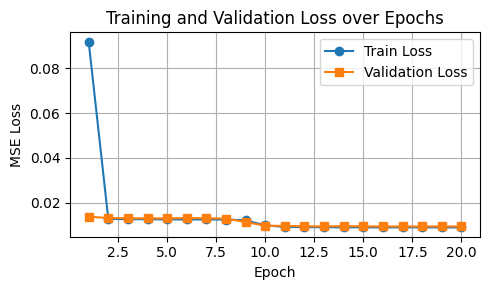

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 3))
epochs = range(1, len(train_losses) + 1)  # <-- use recorded losses length
plt.plot(epochs, train_losses, label='Train Loss', marker='o')
plt.plot(epochs, val_losses, label='Validation Loss', marker='s')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
model = torch.load('/content/drive/MyDrive/FYP/FYP-WF-7/3-Models/2-PatchTSTs/SET-1/VANILLA/multi_vanilla_patchtst.pt', weights_only=False)
model.eval()

PatchTSTForPrediction(
  (model): PatchTSTModel(
    (scaler): PatchTSTScaler(
      (scaler): PatchTSTNOPScaler()
    )
    (patchifier): PatchTSTPatchify()
    (masking): Identity()
    (encoder): PatchTSTEncoder(
      (embedder): PatchTSTEmbedding(
        (input_embedding): Linear(in_features=12, out_features=256, bias=True)
      )
      (positional_encoder): PatchTSTPositionalEncoding(
        (positional_dropout): Identity()
      )
      (layers): ModuleList(
        (0-1): 2 x PatchTSTEncoderLayer(
          (self_attn): PatchTSTAttention(
            (k_proj): Linear(in_features=256, out_features=256, bias=True)
            (v_proj): Linear(in_features=256, out_features=256, bias=True)
            (q_proj): Linear(in_features=256, out_features=256, bias=True)
            (out_proj): Linear(in_features=256, out_features=256, bias=True)
          )
          (dropout_path1): Identity()
          (norm_sublayer1): PatchTSTBatchNorm(
            (batchnorm): BatchNorm1d(256, eps

### **Univariate PatchTST - Vanilla**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install -q transformers accelerate datasets scikit-learn

In [ ]:
import numpy as np
import torch
from torch.utils.data import TensorDataset, DataLoader
from transformers import PatchTSTConfig, PatchTSTForPrediction
from torch.optim import AdamW
import torch.nn as nn
from tqdm import tqdm
import matplotlib.pyplot as plt
import os


In [ ]:
# 0 → Feature_0 | 1 → Feature_1 | 2 → Feature_2 | 3 → Feature_3

feature_idx = 2
print(f"✅ Forecasting Feature = {feature_idx}")


✅ Forecasting Feature = 3


In [ ]:
base_path = '/content/drive/MyDrive/FYP/FYP-WF-7/2-PREPROCESSED_DATA/'

X_train = np.load(base_path + 'X_train.npy')
y_train = np.load(base_path + 'y_train.npy')
X_val = np.load(base_path + 'X_val.npy')
y_val = np.load(base_path + 'y_val.npy')
X_test = np.load(base_path + 'X_test.npy')
y_test = np.load(base_path + 'y_test.npy')

# Select only the chosen feature → shape: (samples, seq_len, 1)
X_train = X_train[:, :, [feature_idx]]
y_train = y_train[:, :, [feature_idx]]
X_val = X_val[:, :, [feature_idx]]
y_val = y_val[:, :, [feature_idx]]
X_test = X_test[:, :, [feature_idx]]
y_test = y_test[:, :, [feature_idx]]


In [ ]:
# # Handle NaNs & Infs
# feature_mean = np.nanmean(X_train)
# X_train = np.nan_to_num(X_train, nan=feature_mean, posinf=feature_mean, neginf=feature_mean)
# y_train = np.nan_to_num(y_train, nan=feature_mean, posinf=feature_mean, neginf=feature_mean)
# X_val = np.nan_to_num(X_val, nan=feature_mean, posinf=feature_mean, neginf=feature_mean)
# y_val = np.nan_to_num(y_val, nan=feature_mean, posinf=feature_mean, neginf=feature_mean)
# X_test = np.nan_to_num(X_test, nan=feature_mean, posinf=feature_mean, neginf=feature_mean)
# y_test = np.nan_to_num(y_test, nan=feature_mean, posinf=feature_mean, neginf=feature_mean)

# print(f"✅ NaNs handled. Feature_{feature_idx} mean: {feature_mean:.6f}")

In [ ]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)

print("Train input range:", X_train_tensor.min().item(), X_train_tensor.max().item())
print("Train label range:", y_train_tensor.min().item(), y_train_tensor.max().item())
print("Any NaNs in X_train?", torch.isnan(X_train_tensor).any().item())
print("Any NaNs in y_train?", torch.isnan(y_train_tensor).any().item())


Train input range: 0.0 1.0
Train label range: 0.0 1.0
Any NaNs in X_train? False
Any NaNs in y_train? False


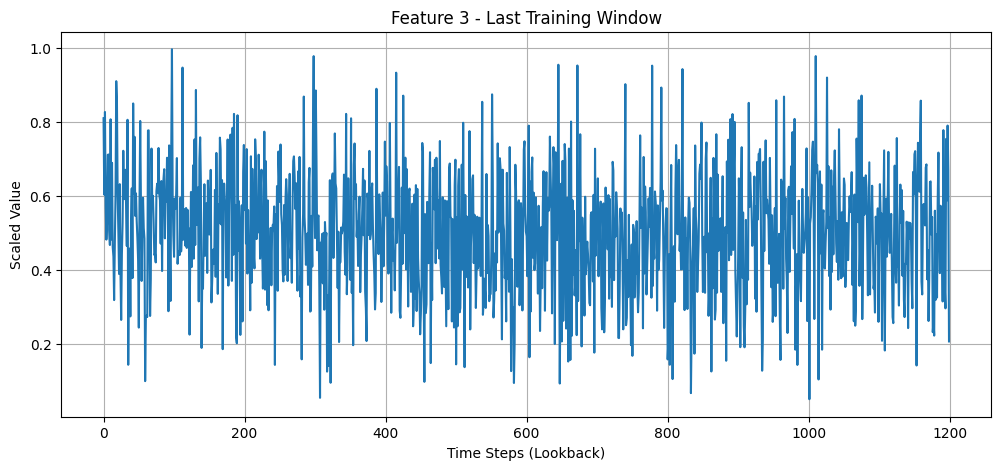

In [ ]:
import matplotlib.pyplot as plt

last_window_tensor, _ = train_dataset[-1]
last_window = last_window_tensor.squeeze().numpy()

plt.figure(figsize=(12, 5))
plt.plot(last_window, color='C0')
plt.title(f'Feature {feature_idx} - Last Training Window')
plt.xlabel('Time Steps (Lookback)')
plt.ylabel('Scaled Value')
plt.grid(True)
plt.show()


In [ ]:
config = PatchTSTConfig(
    context_length=1200,
    prediction_length=240,
    patch_length=12,
    patch_stride=3,
    num_input_channels=1,
    num_targets=1,
    d_model=256,
    num_attention_heads=3,
    num_hidden_layers=2,
    ffn_dim=128,
    dropout=0.1,
    loss="mse",
    scaling=None,
    # activation_function='gelu'
)
model = PatchTSTForPrediction(config)


In [ ]:
uni_vanilla_dir = '/content/drive/MyDrive/FYP/FYP-WF-7/3-Models/2-PatchTSTs/SET-2/VANILLA/'
os.makedirs(uni_vanilla_dir, exist_ok=True)
model_save_path = os.path.join(uni_vanilla_dir, f'feature_{feature_idx}_best')
os.makedirs(model_save_path, exist_ok=True)

# Training Setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

criterion = nn.MSELoss()
optimizer = AdamW(model.parameters(), lr=1e-5)


In [ ]:
# Training Loop
num_epochs = 15
best_val_loss = float('inf')

# Early Stopping Parameters
patience = 5
early_stop_counter = 0

train_losses, val_losses = [], []

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0

    for inputs, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
        inputs, labels = inputs.to(device), labels.to(device)
        if inputs.dim() == 2:
            inputs = inputs.unsqueeze(1)
        optimizer.zero_grad()
        outputs = model(past_values=inputs, future_values=labels)
        loss = outputs.loss
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        train_loss += loss.item()

    avg_train_loss = train_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    # Validation
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            if inputs.dim() == 2:
                inputs = inputs.unsqueeze(1)
            outputs = model(past_values=inputs, future_values=labels)
            loss = outputs.loss
            val_loss += loss.item()

    avg_val_loss = val_loss / len(val_loader)
    val_losses.append(avg_val_loss)
    print(f"Epoch {epoch+1} | Train Loss: {avg_train_loss:.6f} | Val Loss: {avg_val_loss:.6f}")

    # Save best model
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        model.save_pretrained(model_save_path)
        print("✅ Saved best model.")
        early_stop_counter = 0
    else:
        early_stop_counter += 1
        print(f"⚠️ Early Stop Counter: {early_stop_counter} epoch(s).")

    if early_stop_counter >= patience:
        print(f"🛑 No improvement for {patience} epochs).")
        break

# from transformers import AutoModel
# model = AutoModel.from_pretrained(model_save_path)


Epoch 1/4: 100%|██████████| 1596/1596 [01:08<00:00, 23.46it/s]


Epoch 1 | Train Loss: 0.026443 | Val Loss: 0.028422


Epoch 2/4: 100%|██████████| 1596/1596 [01:10<00:00, 22.74it/s]


Epoch 2 | Train Loss: 0.026440 | Val Loss: 0.028422


Epoch 3/4:  29%|██▉       | 465/1596 [00:21<00:51, 22.06it/s]


KeyboardInterrupt: 

In [ ]:
# Save final model
torch.save(model, os.path.join(uni_vanilla_dir, f'f_{feature_idx}_uni_vanilla_patchtst.pt'))
print(f"✅ Full univariate model for Feature_{feature_idx} saved!")


In [ ]:
# Plot Training History

plt.figure(figsize=(5, 3))
epochs = range(1, len(train_losses) + 1)
plt.plot(epochs, train_losses, label='Train Loss', marker='o')
plt.plot(epochs, val_losses, label='Validation Loss', marker='s')
plt.title(f'Feature_{feature_idx} | Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# # Load model for evaluation
# model = torch.load(os.path.join(uni_vanilla_dir, f'f_{feature_idx}_uni_vanilla_patchtst.pt'), weights_only=False)
# model.eval()
# print(f"✅ Loaded Univariate PatchTST Model for Feature_{feature_idx}")

# **MODEL EVALUATION**

## ***MULTIVARIATE PatchTST MODEL***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Model Forecasting**

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from transformers import PatchTSTForPrediction
import pickle
import os

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

lookback = 1200
horizon = 240

# Folder where you saved everything
base_dir = "/content/drive/MyDrive/FYP/FYP-WF-7/"
best_model_dir = os.path.join(base_dir, "3-Models/2-PatchTSTs/SET-1/VANILLA/multi_vanilla_patchtst.pt")
scaler_path = os.path.join(base_dir, "2-PREPROCESSED_DATA/MinMax_Scaler.pkl")
X_test_path = os.path.join(base_dir, "2-PREPROCESSED_DATA/X_test.npy")
y_test_path = os.path.join(base_dir, "2-PREPROCESSED_DATA/y_test.npy")
print("🔄 Loading model and scaler...")

# Load the scaler
with open(scaler_path, "rb") as f:
    scaler = pickle.load(f)

scaled_X_test = np.load(X_test_path)
scaled_y_test = np.load(y_test_path)
print("✅ Data loaded:", scaled_X_test.shape, scaled_y_test.shape)


# Select the last test window for the chosen feature
X_last = scaled_X_test[-1]  # shape (1200, 4)
X_tensor = torch.tensor(X_last, dtype=torch.float32).unsqueeze(0).to(device)  # shape (1, 1200, 4)

y_last = scaled_y_test[-1]   # (240, 4)
print("✅ Input tensor shape:", X_tensor.shape)


🔄 Loading model and scaler...
✅ Data loaded: (5560, 1200, 4) (5560, 240, 4)
✅ Input tensor shape: torch.Size([1, 1200, 4])


In [ ]:
# print(X_tensor.shape)  # should be [1, 4, 1200]
# print(X_tensor[0])


In [ ]:
# Load the trained PatchTST model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"✅ Using device: {device}")

model_path = "/content/drive/MyDrive/FYP/FYP-WF-7/3-Models/2-PatchTSTs/SET-1/VANILLA/multi_vanilla_patchtst.pt"
# Force map to CPU if CUDA isn't available
model = torch.load(model_path, map_location=device, weights_only=False)
model.to(device)
model.eval()

print("✅ PatchTST model loaded successfully!")


✅ Using device: cuda
✅ PatchTST model loaded successfully!


In [ ]:
with torch.no_grad():
    outputs = model(past_values=X_tensor)
    forecast = outputs.prediction_outputs.squeeze().cpu().numpy()

print("✅ Raw forecast stats:")
print(f"Shape: {forecast.shape}")
print(f"Min: {forecast.min()}, Max: {forecast.max()}")
print(f"NaN count: {np.isnan(forecast).sum()}")
print(f"NaN per feature: {np.isnan(forecast).sum(axis=0)}")

# Check if the issue is in the scaler
print(f"\n✅ Scaler info for Feature 1:")
print(f"Min: {scaler.min_[1]}, Scale: {scaler.scale_[1]}")

# Test the scaling operation separately for Feature 1
feature_1_forecast = forecast[:, 1]
print(f"\n✅ Feature 1 forecast before scaling:")
print(f"Values: {feature_1_forecast[:10]}")  # First 10 values
print(f"Any NaN before scaling: {np.isnan(feature_1_forecast).any()}")

# Manual scaling test
if not np.isnan(feature_1_forecast).any():
    test_scaled = feature_1_forecast[:10].reshape(-1, 1) * (1/scaler.scale_[1]) - (scaler.min_[1]/scaler.scale_[1])
    print(f"After scaling test: {test_scaled.flatten()}")

✅ Raw forecast stats:
Shape: (240, 4)
Min: 0.46889927983283997, Max: 0.8397256731987
NaN count: 0
NaN per feature: [0 0 0 0]

✅ Scaler info for Feature 1:
Min: -1.5466981059048515, Scale: 0.04989348728725327

✅ Feature 1 forecast before scaling:
Values: [0.69012076 0.6811328  0.6821787  0.6732516  0.675541   0.6776225
 0.69760364 0.7127398  0.73767984 0.7540251 ]
Any NaN before scaling: False
After scaling test: [44.83188055 44.65173754 44.67269985 44.49377775 44.5396626  44.58138174
 44.98185777 45.28522767 45.78509279 46.11269592]


In [ ]:
num_features = X_last.shape[1] if X_last.ndim == 2 else 1

for feature_idx in range(num_features):
    # Select forecast for this feature
    forecast_feature = forecast[:, feature_idx] if forecast.ndim == 2 else forecast

    # # Optional: inverse transform to original scale
    # feature_min = scaler.min_[feature_idx]
    # feature_scale = scaler.scale_[feature_idx]
    # forecast_feature_orig = forecast_feature.reshape(-1,1) * (1/feature_scale) - (feature_min/feature_scale)
    # forecast_feature_orig = forecast_feature_orig.flatten()

    print(f"\n✅ Forecasted values — Feature_{feature_idx}:")
    # for step, val in enumerate(forecast_feature_orig, 1):
    for step, val in enumerate(forecast_feature, 1):
        print(f"Step {step}: {val:.4f}")



✅ Forecasted values — Feature_0:
Step 1: 0.5419
Step 2: 0.5096
Step 3: 0.4998
Step 4: 0.4925
Step 5: 0.5013
Step 6: 0.5096
Step 7: 0.5384
Step 8: 0.5746
Step 9: 0.6140
Step 10: 0.6544
Step 11: 0.6940
Step 12: 0.7323
Step 13: 0.7601
Step 14: 0.7838
Step 15: 0.8062
Step 16: 0.8110
Step 17: 0.8033
Step 18: 0.7898
Step 19: 0.7616
Step 20: 0.7341
Step 21: 0.6873
Step 22: 0.6513
Step 23: 0.6104
Step 24: 0.5770
Step 25: 0.5440
Step 26: 0.5228
Step 27: 0.4968
Step 28: 0.5004
Step 29: 0.5077
Step 30: 0.5179
Step 31: 0.5390
Step 32: 0.5754
Step 33: 0.6185
Step 34: 0.6520
Step 35: 0.6934
Step 36: 0.7298
Step 37: 0.7636
Step 38: 0.7840
Step 39: 0.8111
Step 40: 0.8144
Step 41: 0.8016
Step 42: 0.7897
Step 43: 0.7633
Step 44: 0.7265
Step 45: 0.6924
Step 46: 0.6510
Step 47: 0.6172
Step 48: 0.5787
Step 49: 0.5469
Step 50: 0.5201
Step 51: 0.4977
Step 52: 0.4872
Step 53: 0.5010
Step 54: 0.5147
Step 55: 0.5441
Step 56: 0.5646
Step 57: 0.6150
Step 58: 0.6541
Step 59: 0.6937
Step 60: 0.7333
Step 61: 0.7557

In [ ]:
# print("Feature_1 values in last window:", X_last[:, 1])
# print("Feature_1 y_test last window:", y_last[:,1])

# X_train_path = os.path.join(base_dir, "2-PREPROCESSED_DATA/X_train.npy")
# X_train = np.load(X_train_path)
# print("Feature_1 train min/max:", X_train[:,:,1].min(), X_train[:,:,1].max())


### **Actual Vs Forecasted Horizon Plots - Inverse Scaled**

✅ Feature_0: Computed tolerance band ±0.3489 (Original Scale)


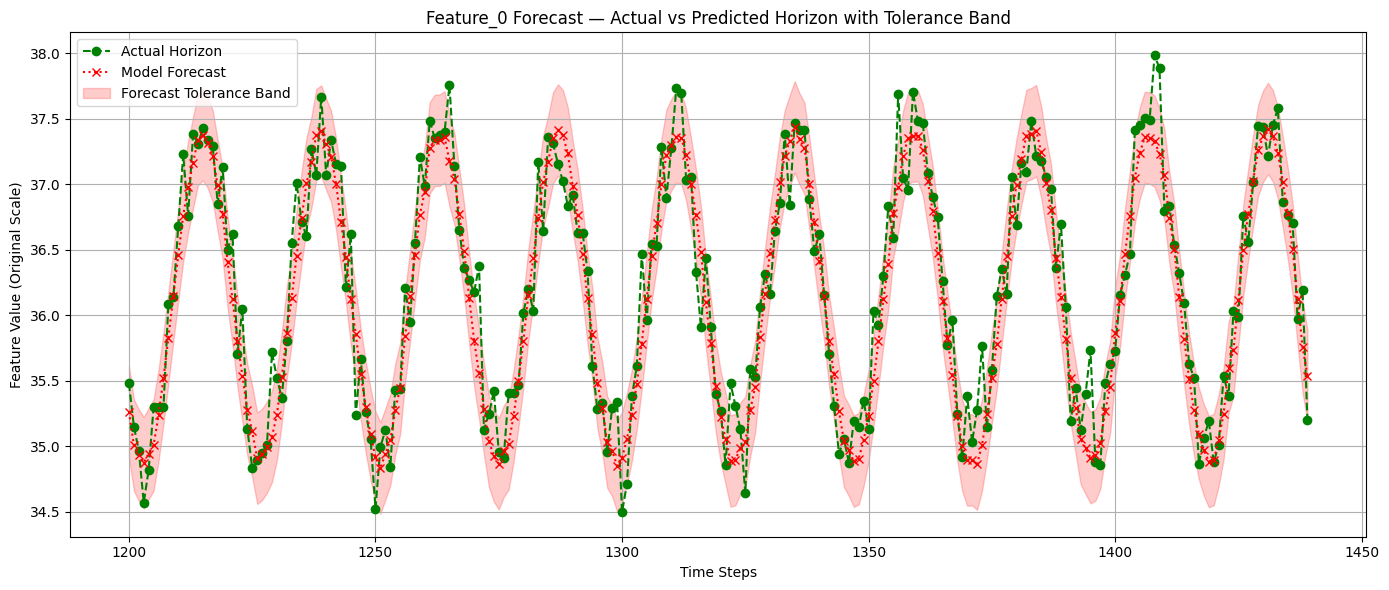

✅ Feature_1: Computed tolerance band ±0.4422 (Original Scale)


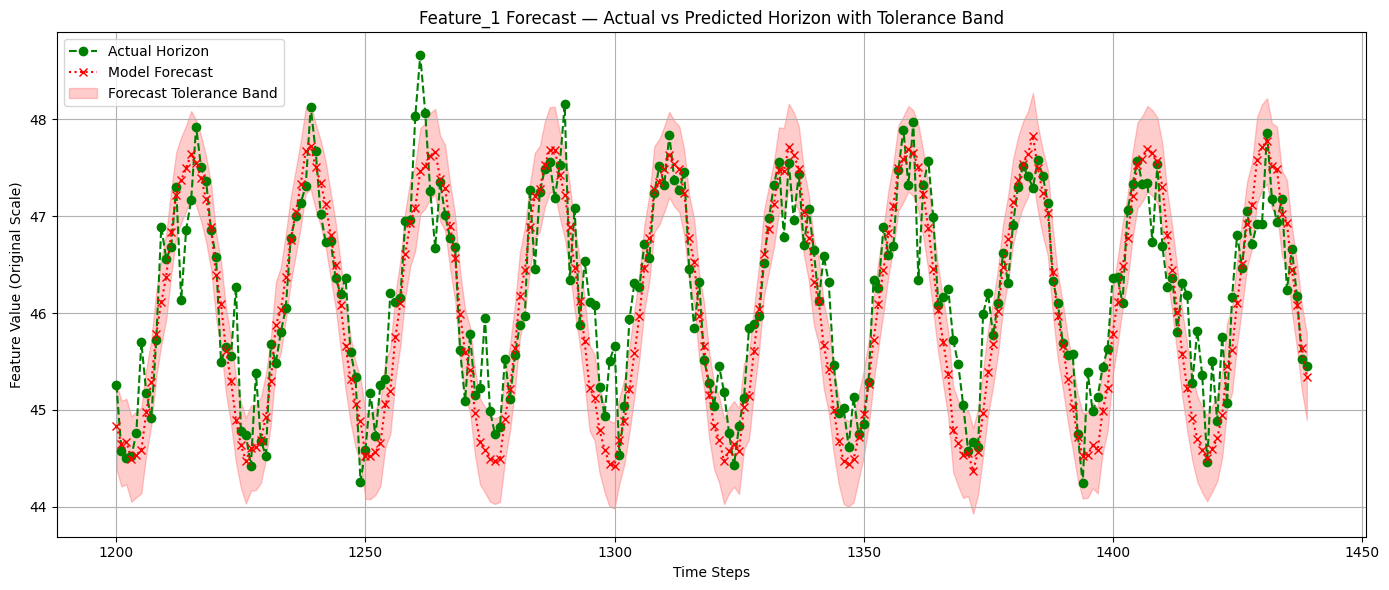

✅ Feature_2: Computed tolerance band ±0.1042 (Original Scale)


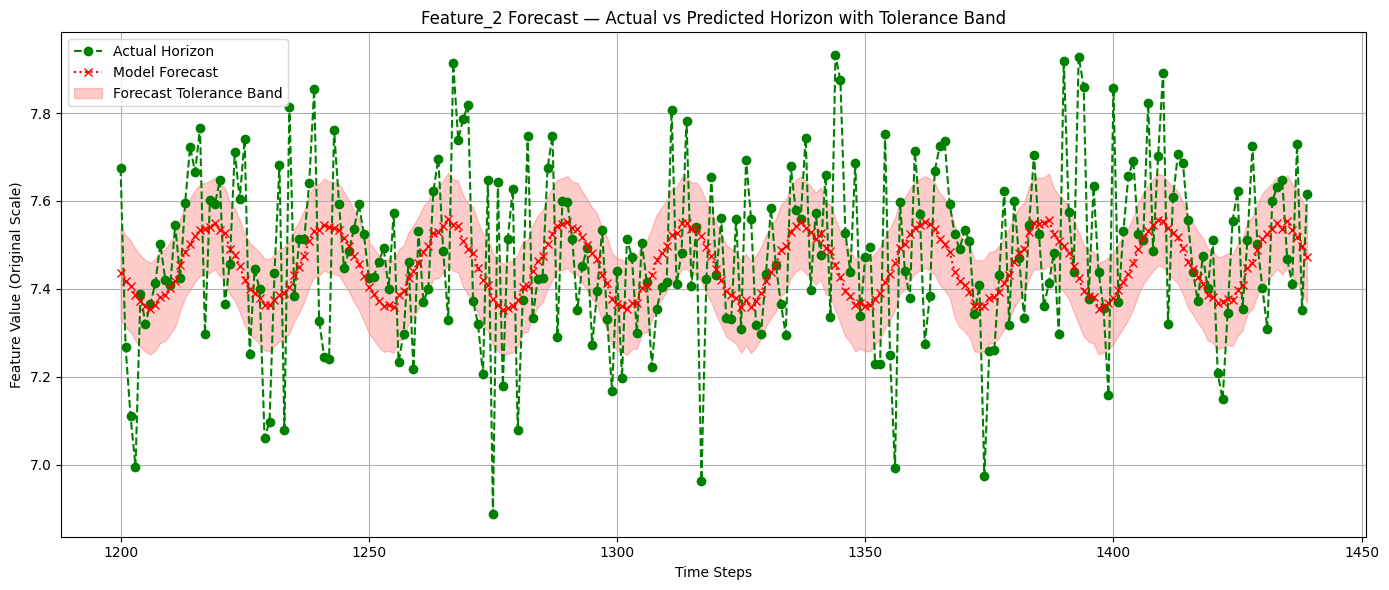

✅ Feature_3: Computed tolerance band ±0.0822 (Original Scale)


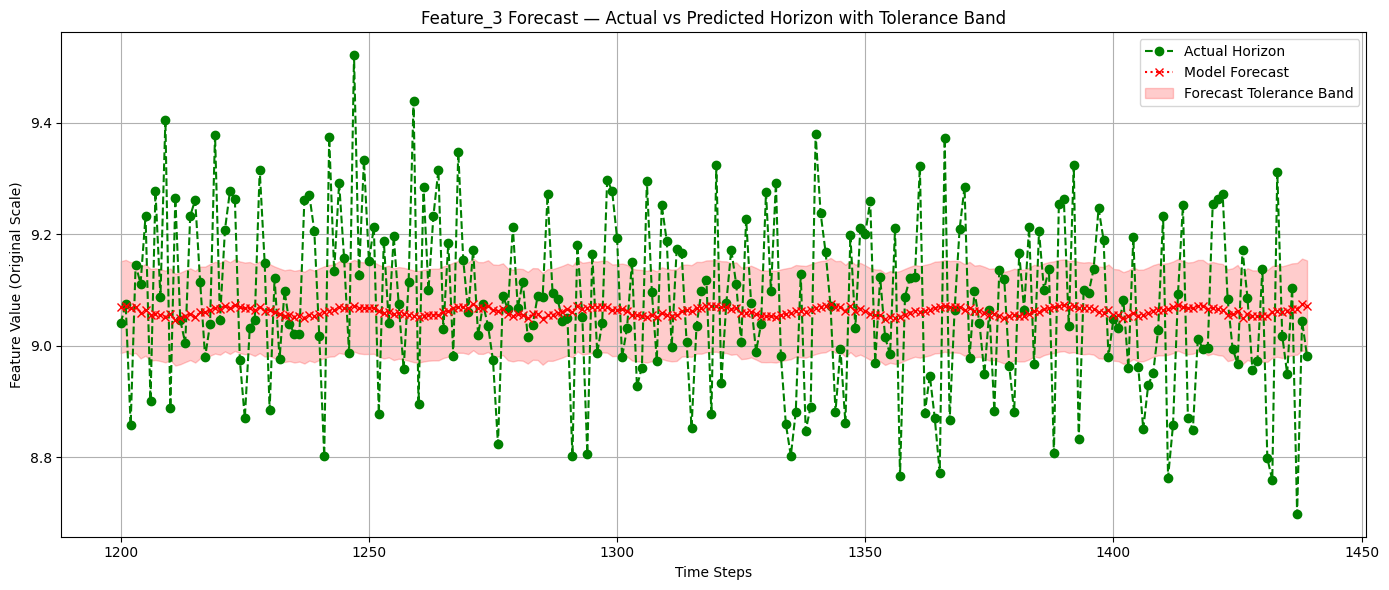

In [ ]:
num_features = X_last.shape[1] if X_last.ndim == 2 else 1

for feature_idx in range(num_features):
    # Select single feature data
    X_feature = X_last[:, feature_idx] if X_last.ndim == 2 else X_last
    y_feature = y_last[:horizon, feature_idx] if y_last.ndim == 2 else y_last[:horizon]
    forecast_feature = forecast[:, feature_idx] if forecast.ndim == 2 else forecast

    # -----------------------------
    # Inverse transform to original scale
    # -----------------------------
    # MinMaxScaler expects 2D input: [n_samples, n_features]

    # Select only the single feature column (reshape to 2D)
    y_feature_scaled = y_feature.reshape(-1, 1)
    forecast_feature_scaled = forecast_feature.reshape(-1, 1)

    # Use the scaler's min_ and scale_ for this feature
    feature_min = scaler.min_[feature_idx]
    feature_scale = scaler.scale_[feature_idx]

    y_feature_orig = y_feature_scaled * (1/feature_scale) - (feature_min/feature_scale)
    forecast_feature_orig = forecast_feature_scaled * (1/feature_scale) - (feature_min/feature_scale)

    # Flatten to 1D arrays
    y_feature_orig = y_feature_orig.flatten()
    forecast_feature_orig = forecast_feature_orig.flatten()


    # For X_feature (lookback), inverse transform the single feature
    X_feature_scaled = X_feature.reshape(-1, 1)  # 2D
    feature_min = scaler.min_[feature_idx]
    feature_scale = scaler.scale_[feature_idx]

    X_feature_orig = X_feature_scaled * (1/feature_scale) - (feature_min/feature_scale)
    X_feature_orig = X_feature_orig.flatten()


    # ================================
    # Compute Tolerance Band in original scale
    # ================================
    lowest_actual = np.min(y_feature_orig)
    highest_actual = np.max(y_feature_orig)
    band_half = (highest_actual - lowest_actual) / 10

    band_lower = forecast_feature_orig - band_half
    band_upper = forecast_feature_orig + band_half
    print(f"✅ Feature_{feature_idx}: Computed tolerance band ±{band_half:.4f} (Original Scale)")

    # ================================
    # Plot in original scale
    # ================================
    plt.figure(figsize=(14, 6))

    # Actual future
    plt.plot(
        np.arange(lookback, lookback + horizon),
        y_feature_orig,
        color="green",
        linestyle="--",
        marker="o",
        label="Actual Horizon",
    )

    # Model forecast
    plt.plot(
        np.arange(lookback, lookback + len(forecast_feature_orig)),
        forecast_feature_orig,
        color="red",
        linestyle=":",
        marker="x",
        label="Model Forecast",
    )

    # Tolerance band as shaded area
    plt.fill_between(
        np.arange(lookback, lookback + len(forecast_feature_orig)),
        band_lower,
        band_upper,
        color='red',
        alpha=0.2,
        label="Forecast Tolerance Band"
    )

    plt.xlabel("Time Steps")
    plt.ylabel("Feature Value (Original Scale)")
    plt.title(f"Feature_{feature_idx} Forecast — Actual vs Predicted Horizon with Tolerance Band")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


### **Actual Vs Forecasted Horizon Plots - Tolerance Band Logic 1**

✅ Feature_0: Computed tolerance band ±0.0444


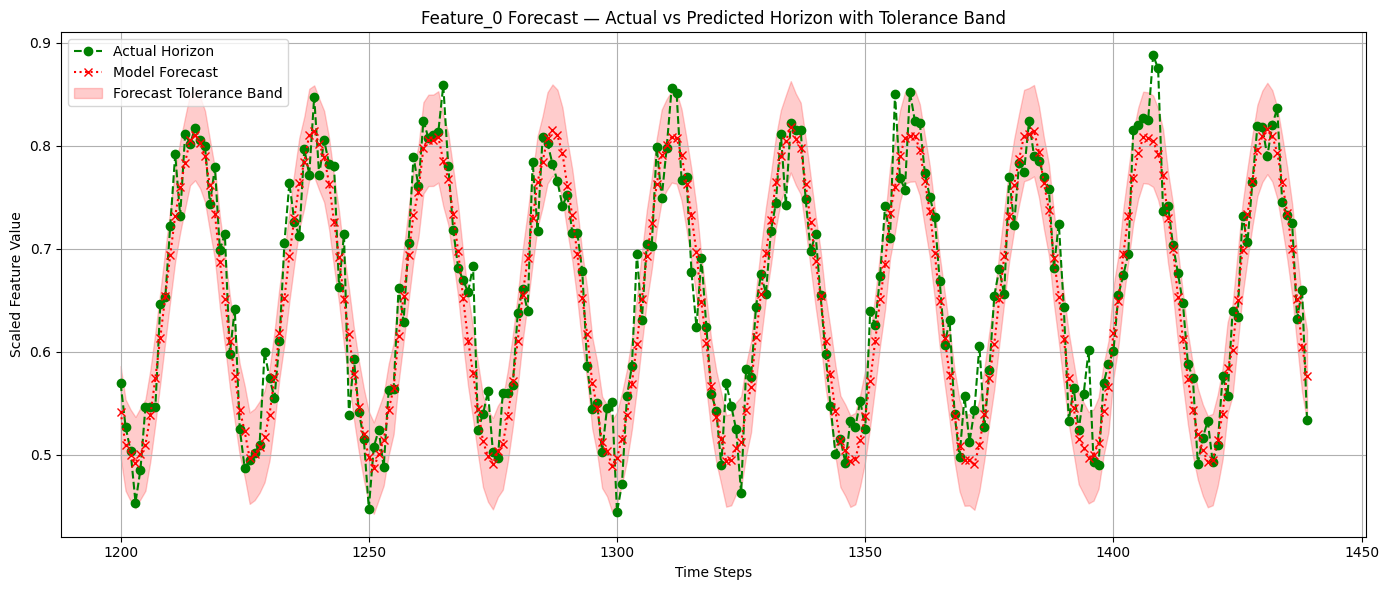

=== Feature_0 — Last Test Window: Actual vs Forecasted ===


✅ Feature_1: Computed tolerance band ±0.0221


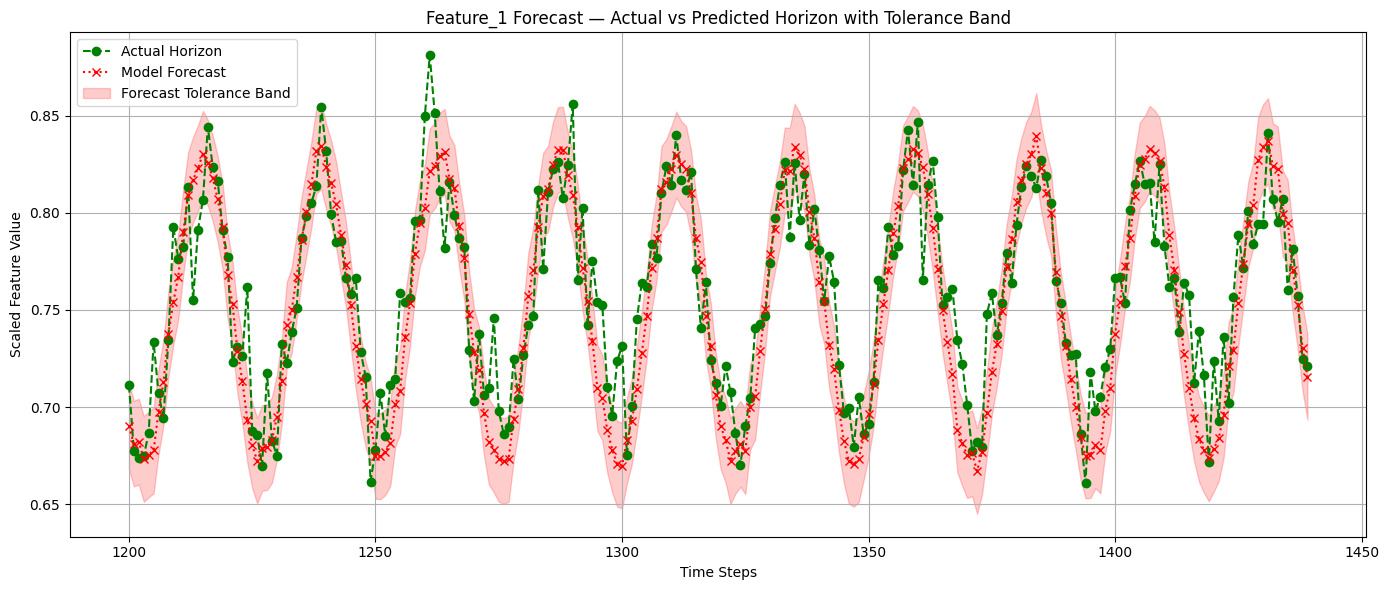

=== Feature_1 — Last Test Window: Actual vs Forecasted ===


✅ Feature_2: Computed tolerance band ±0.0413


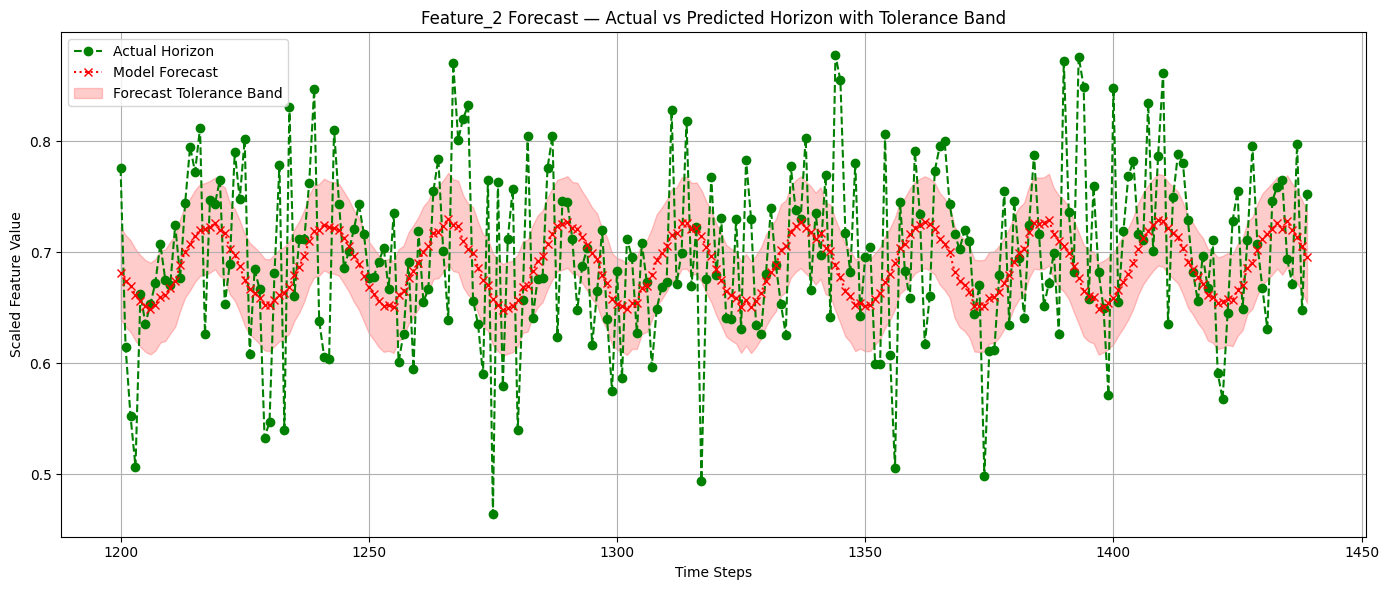

=== Feature_2 — Last Test Window: Actual vs Forecasted ===


✅ Feature_3: Computed tolerance band ±0.0878


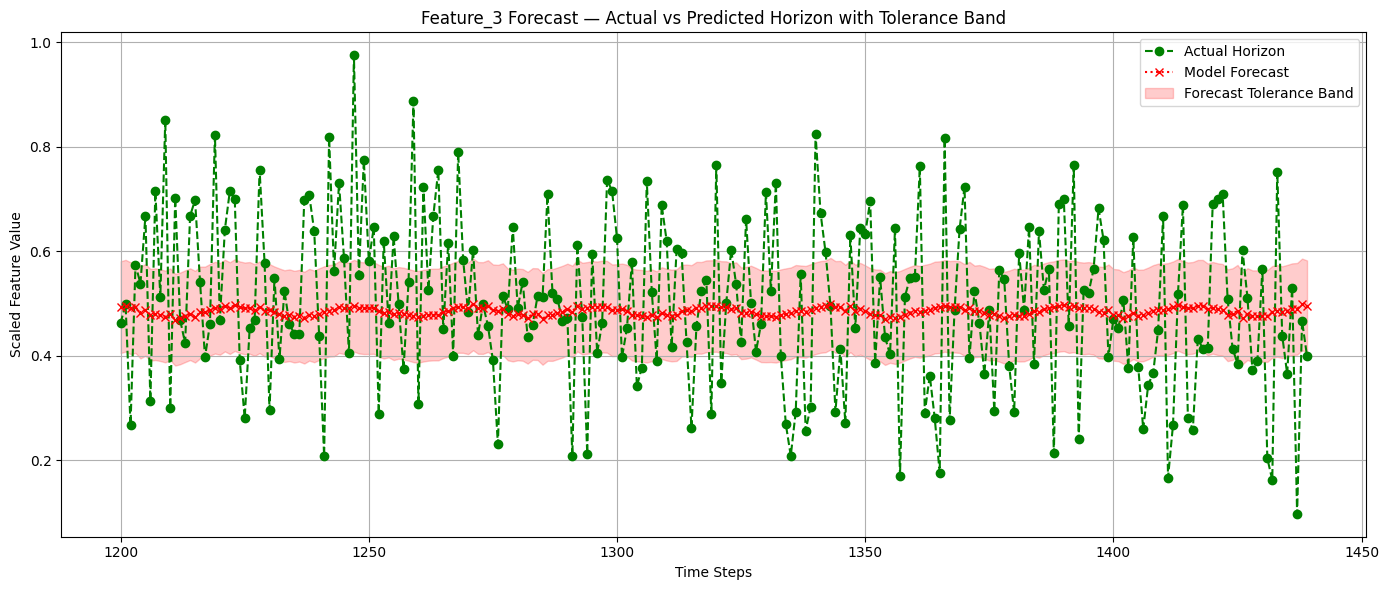

=== Feature_3 — Last Test Window: Actual vs Forecasted ===




In [ ]:
num_features = X_last.shape[1] if X_last.ndim == 2 else 1

for feature_idx in range(num_features):
    # Select single feature data
    X_feature = X_last[:, feature_idx] if X_last.ndim == 2 else X_last
    y_feature = y_last[:horizon, feature_idx] if y_last.ndim == 2 else y_last[:horizon]
    forecast_feature = forecast[:, feature_idx] if forecast.ndim == 2 else forecast

    # ============================================================
    # Compute Tolerance Band
    # ============================================================
    lowest_actual = np.min(y_feature)
    highest_actual = np.max(y_feature)
    band_half = (highest_actual - lowest_actual) / 10
    band_lower = forecast_feature - band_half
    band_upper = forecast_feature + band_half
    print(f"✅ Feature_{feature_idx}: Computed tolerance band ±{band_half:.4f}")

    plt.figure(figsize=(14, 6))

    # # Lookback (past)
    # plt.plot(
    #     np.arange(lookback),
    #     X_feature,
    #     label=f"Feature_{feature_idx} Lookback (Past {lookback} timesteps)",
    #     color="blue",
    # )

    # Actual future
    plt.plot(
        np.arange(lookback, lookback + horizon),
        y_feature,
        color="green",
        linestyle="--",
        marker="o",
        label="Actual Horizon",
    )

    # Model forecast
    plt.plot(
        np.arange(lookback, lookback + len(forecast_feature)),
        forecast_feature,
        color="red",
        linestyle=":",
        marker="x",
        label="Model Forecast",
    )

    # Tolerance band as shaded area
    plt.fill_between(
        np.arange(lookback, lookback + len(forecast_feature)),
        band_lower,
        band_upper,
        color='red',
        alpha=0.2,
        label="Forecast Tolerance Band"
    )

    plt.xlabel("Time Steps")
    plt.ylabel("Scaled Feature Value")
    plt.title(f"Feature_{feature_idx} Forecast — Actual vs Predicted Horizon with Tolerance Band")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Print actual vs forecast for first window
    print(f"=== Feature_{feature_idx} — Last Test Window: Actual vs Forecasted ===")
    # for i in range(min(len(forecast_feature), len(y_feature))):
        # print(f"Step {i+1}: Actual = {y_feature[i]:.4f}, Forecasted = {forecast_feature[i]:.4f}")
    print("\n" + "="*80 + "\n")


### **Actual Vs Forecasted Horizon Plots - Tolerance Band Logic 2**

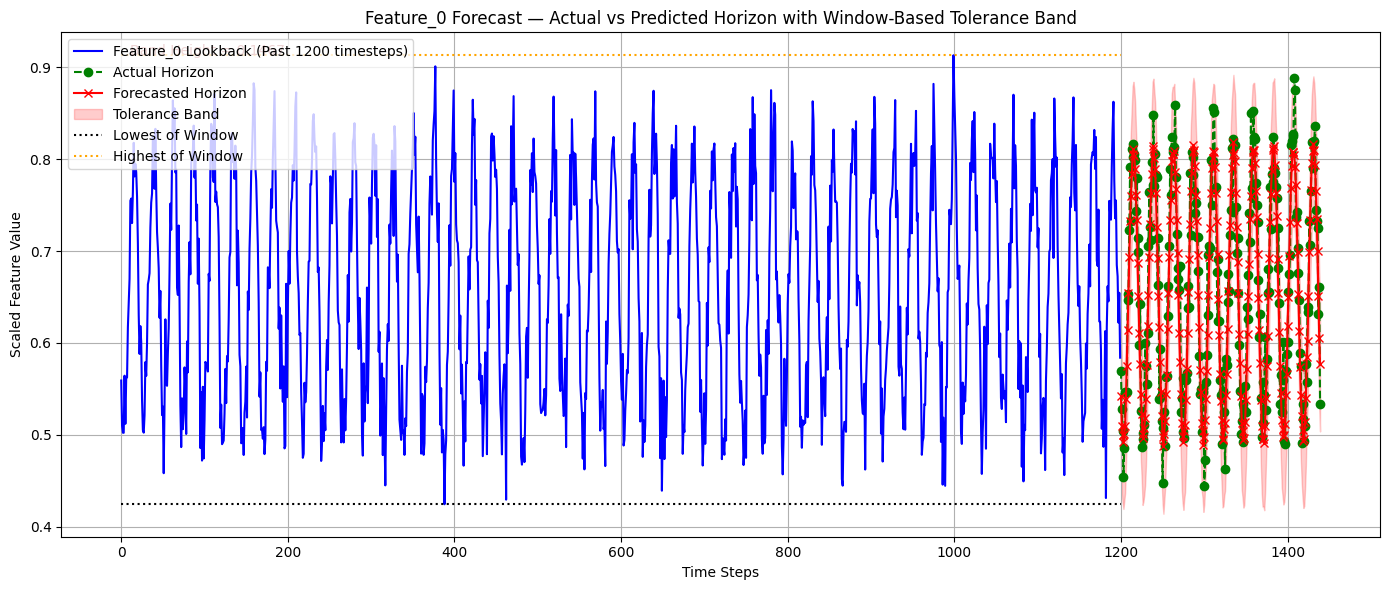

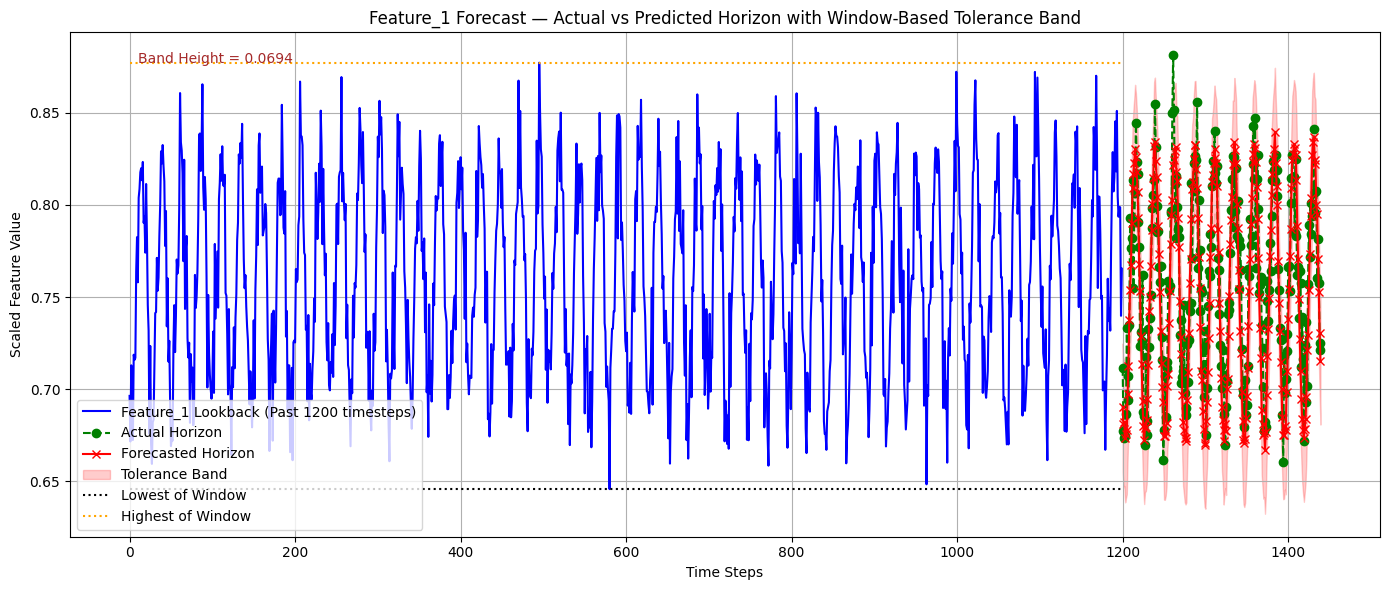

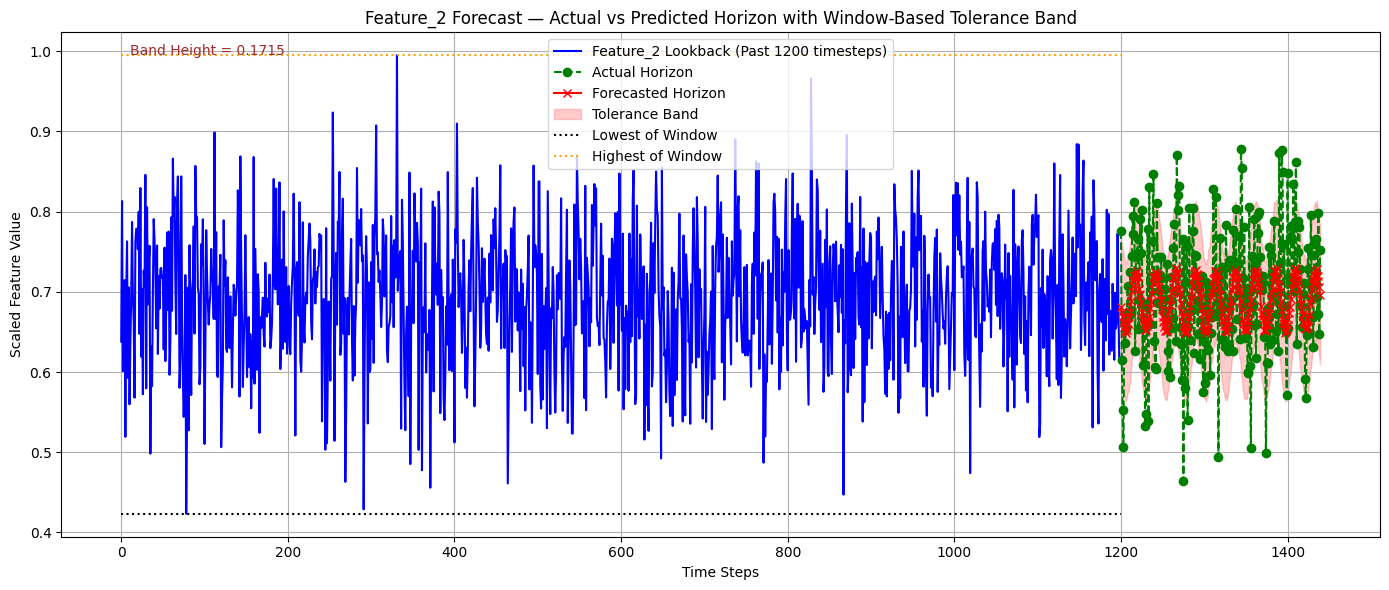

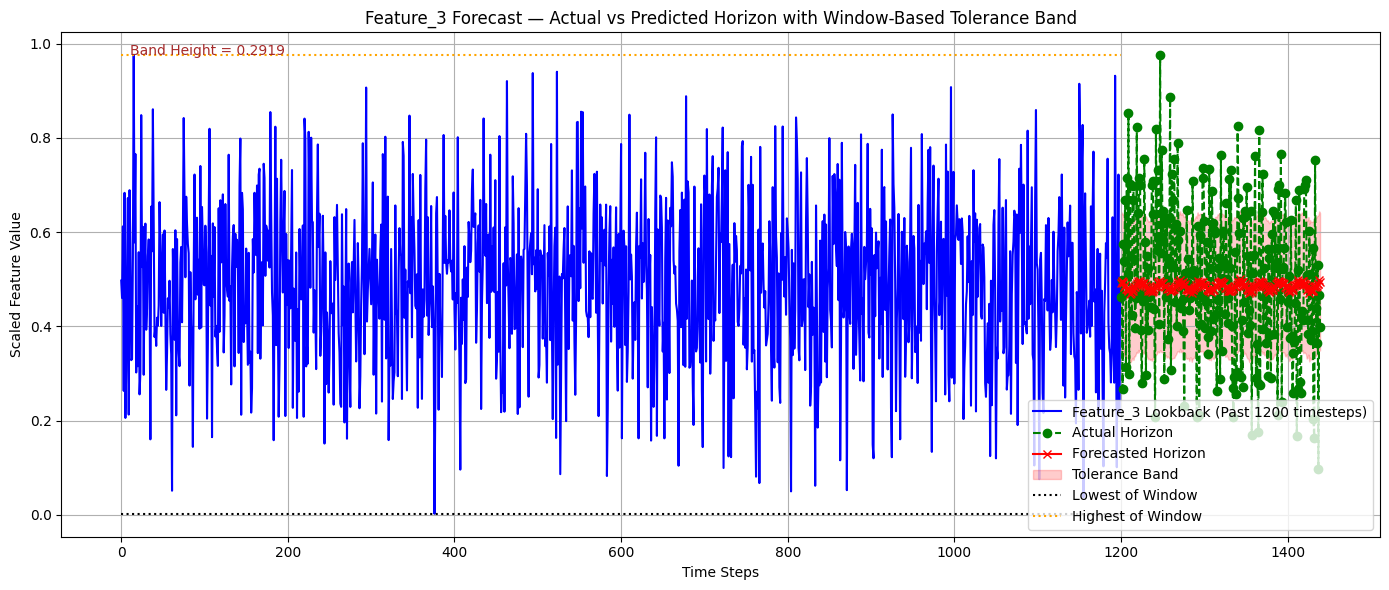

In [ ]:
for feature_idx in range(num_features):
    # Select single feature data
    X_feature = X_last[:, feature_idx] if X_last.ndim == 2 else X_last
    y_feature = y_last[:horizon, feature_idx] if y_last.ndim == 2 else y_last[:horizon]
    forecast_feature = forecast[:, feature_idx] if forecast.ndim == 2 else forecast

    # ================================
    # Compute tolerance band (window dynamics)
    # ================================
    lowest_mean = np.min(X_feature)
    highest_mean = np.max(X_feature)
    band_height = 0.30 * (highest_mean - lowest_mean)  # 30% of window range
    band_half = band_height / 2

    plt.figure(figsize=(14,6))

    # Lookback (past)
    plt.plot(
        np.arange(lookback),
        X_feature,
        color='blue',
        label=f'Feature_{feature_idx} Lookback (Past {lookback} timesteps)'
    )

    # Actual future
    plt.plot(
        np.arange(lookback, lookback + horizon),
        y_feature,
        color='green',
        linestyle='--',
        marker='o',
        label='Actual Horizon'
    )

    # Forecast
    plt.plot(
        np.arange(lookback, lookback + len(forecast_feature)),
        forecast_feature,
        color='red',
        linestyle='-',
        marker='x',
        label='Forecasted Horizon'
    )

    # Tolerance band
    band_lower = forecast_feature - band_half
    band_upper = forecast_feature + band_half
    plt.fill_between(
        np.arange(lookback, lookback + len(forecast_feature)),
        band_lower,
        band_upper,
        color='red',
        alpha=0.2,
        label='Tolerance Band'
    )

    # Window min/max lines
    plt.hlines(lowest_mean, 0, lookback, colors='black', linestyles='dotted', label='Lowest of Window')
    plt.hlines(highest_mean, 0, lookback, colors='orange', linestyles='dotted', label='Highest of Window')

    # Annotate band height
    plt.text(10, highest_mean, f'Band Height = {band_height:.4f}', fontsize=10, color='brown')

    plt.xlabel("Time Steps")
    plt.ylabel("Scaled Feature Value")
    plt.title(f"Feature_{feature_idx} Forecast — Actual vs Predicted Horizon with Window-Based Tolerance Band")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


### **Performance Analysis**

In [ ]:
num_features = X_last.shape[1] if X_last.ndim == 2 else 1

for feature_idx in range(num_features):
    # Select single feature data
    X_feature = X_last[:, feature_idx] if X_last.ndim == 2 else X_last
    y_feature = y_last[:horizon, feature_idx] if y_last.ndim == 2 else y_last[:horizon]
    forecast_feature = forecast[:, feature_idx] if forecast.ndim == 2 else forecast

    # Inverse transform to original scale
    feature_min = scaler.min_[feature_idx]
    feature_scale = scaler.scale_[feature_idx]

    y_orig = y_feature.reshape(-1,1) * (1/feature_scale) - (feature_min/feature_scale)
    forecast_orig = forecast_feature.reshape(-1,1) * (1/feature_scale) - (feature_min/feature_scale)

    y_orig = y_orig.flatten()
    forecast_orig = forecast_orig.flatten()

    # Compute tolerance band
    lowest_actual = np.min(y_orig)
    highest_actual = np.max(y_orig)
    band_half = (highest_actual - lowest_actual) / 10

    # Step-wise accuracy
    accuracies = []
    print(f"\n=== Feature_{feature_idx} Forecast Performance ===")
    for i in range(len(forecast_orig)):
        lower = forecast_orig[i] - band_half
        upper = forecast_orig[i] + band_half

        if lower <= y_orig[i] <= upper:
            acc = 100.0
        else:
            acc = 0.0
        accuracies.append(acc)

        print(f"Step {i+1}: Actual = {y_orig[i]:.4f}, Forecasted = {forecast_orig[i]:.4f}, Accuracy = {acc:.2f}%")

    overall_acc = np.mean(accuracies)
    print(f"\n✅ Overall Forecast Accuracy for Feature_{feature_idx}: {overall_acc:.2f}% "
          f"(based on {len(forecast_orig)} steps within tolerance band)")
    print("="*80)



=== Feature_0 Forecast Performance ===
Step 1: Actual = 35.4780, Forecasted = 35.2613, Accuracy = 100.00%
Step 2: Actual = 35.1484, Forecasted = 35.0070, Accuracy = 100.00%
Step 3: Actual = 34.9643, Forecasted = 34.9300, Accuracy = 100.00%
Step 4: Actual = 34.5685, Forecasted = 34.8728, Accuracy = 100.00%
Step 5: Actual = 34.8195, Forecasted = 34.9421, Accuracy = 100.00%
Step 6: Actual = 35.2985, Forecasted = 35.0071, Accuracy = 100.00%
Step 7: Actual = 35.2947, Forecasted = 35.2338, Accuracy = 100.00%
Step 8: Actual = 35.2954, Forecasted = 35.5189, Accuracy = 100.00%
Step 9: Actual = 36.0822, Forecasted = 35.8283, Accuracy = 100.00%
Step 10: Actual = 36.1339, Forecasted = 36.1461, Accuracy = 100.00%
Step 11: Actual = 36.6823, Forecasted = 36.4578, Accuracy = 100.00%
Step 12: Actual = 37.2275, Forecasted = 36.7590, Accuracy = 0.00%
Step 13: Actual = 36.7581, Forecasted = 36.9775, Accuracy = 100.00%
Step 14: Actual = 37.3826, Forecasted = 37.1634, Accuracy = 100.00%
Step 15: Actual = 3

### **Performance Accuracy Analysis**

In [ ]:
num_features = X_last.shape[1] if X_last.ndim == 2 else 1

for feature_idx in range(num_features):
    # Select single feature data
    X_feature = X_last[:, feature_idx] if X_last.ndim == 2 else X_last
    y_feature = y_last[:horizon, feature_idx] if y_last.ndim == 2 else y_last[:horizon]
    forecast_feature = forecast[:, feature_idx] if forecast.ndim == 2 else forecast

    # ================================
    # Compute tolerance band (window dynamics)
    # ================================
    lowest_mean = np.min(X_feature)
    highest_mean = np.max(X_feature)
    band_height = 0.30 * (highest_mean - lowest_mean)  # 30% of window range
    band_half = band_height / 2

    band_lower = forecast_feature - band_half
    band_upper = forecast_feature + band_half

    # Check which horizon values lie within the band
    within_band = (y_feature >= band_lower) & (y_feature <= band_upper)

    # Calculate percentage of horizon values within the band
    accuracy_percentage = np.sum(within_band) / len(y_feature) * 100.0

    print(f"✅ Feature_{feature_idx} Accuracy (Window TolBand): {accuracy_percentage:.2f}% of horizon values within forecasted tolerance band")


✅ Feature_0 Accuracy (Window TolBand): 95.83% of horizon values within forecasted tolerance band
✅ Feature_1 Accuracy (Window TolBand): 82.92% of horizon values within forecasted tolerance band
✅ Feature_2 Accuracy (Window TolBand): 77.08% of horizon values within forecasted tolerance band
✅ Feature_3 Accuracy (Window TolBand): 61.25% of horizon values within forecasted tolerance band


## ***UNIVARIATE PatchTST MODEL***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

feature_idx = 3
print(f"✅ Evaluating Univariate PatchTST for Feature_{feature_idx}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Evaluating Univariate PatchTST for Feature_3


### **Model Forecasting**

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
lookback = 1200
horizon = 240

base_dir = "/content/drive/MyDrive/FYP/FYP-WF-7/"
model_path = os.path.join(base_dir, f"3-Models/2-PatchTSTs/SET-2/VANILLA/f_{feature_idx}_uni_vanilla_patchtst.pt")
scaler_path = os.path.join(base_dir, "2-PREPROCESSED_DATA/MinMax_Scaler.pkl")
X_test_path = os.path.join(base_dir, "2-PREPROCESSED_DATA/X_test.npy")
y_test_path = os.path.join(base_dir, "2-PREPROCESSED_DATA/y_test.npy")
print("🔄 Loading model, scaler, and test data...")

# Load trained univariate PatchTST model
model = torch.load(model_path, map_location=device, weights_only=False)
model.to(device)
model.eval()
print("✅ PatchTST model loaded successfully!")

# Load scaler
with open(scaler_path, "rb") as f:
    scaler = pickle.load(f)
print("✅ Scaler loaded!")

# Load and Prepare Test Data
scaled_X_test = np.load(X_test_path)
scaled_y_test = np.load(y_test_path)
print("✅ Test data loaded:", scaled_X_test.shape, scaled_y_test.shape)

# Select only the chosen feature
X_test_feature = scaled_X_test[:, :, [feature_idx]]
y_test_feature = scaled_y_test[:, :, [feature_idx]]

# Select the last window for testing
X_last = X_test_feature[-1]  # shape: (1200, 1)
y_last = y_test_feature[-1]  # shape: (240, 1)

# Convert to tensor
X_tensor = torch.tensor(X_last, dtype=torch.float32).unsqueeze(0).to(device)  # (1, 1200, 1)
print("✅ Input tensor shape:", X_tensor.shape)

# Forecast
with torch.no_grad():
    outputs = model(past_values=X_tensor)
    forecast = outputs.prediction_outputs.squeeze().cpu().numpy()

print("\n✅ Raw Forecast Stats:")
print(f"Shape: {forecast.shape}")
print(f"Min: {forecast.min():.6f}, Max: {forecast.max():.6f}")
print(f"NaN Count: {np.isnan(forecast).sum()}")


🔄 Loading model, scaler, and test data...
✅ PatchTST model loaded successfully!
✅ Scaler loaded!
✅ Test data loaded: (5560, 1200, 4) (5560, 240, 4)
✅ Input tensor shape: torch.Size([1, 1200, 1])

✅ Raw Forecast Stats:
Shape: (240,)
Min: 0.488586, Max: 0.492209
NaN Count: 0


In [ ]:
# Inverse Transform Forecast and Ground Truth
if forecast.ndim == 0:
    forecast = np.expand_dims(forecast, axis=0)

# Reshape to 2D for inverse_transform compatibility
forecast_reshaped = forecast.reshape(-1, 1)
y_last_reshaped = y_last.reshape(-1, 1)

# Inverse transform using the same feature scaling parameters
forecast_orig = forecast_reshaped * (1 / scaler.scale_[feature_idx]) - (scaler.min_[feature_idx] / scaler.scale_[feature_idx])
y_orig = y_last_reshaped * (1 / scaler.scale_[feature_idx]) - (scaler.min_[feature_idx] / scaler.scale_[feature_idx])

print("\n✅ Forecast (first 10 values):", forecast_orig[:10].flatten())
print("✅ Ground Truth (first 10 values):", y_orig[:10].flatten())



✅ Forecast (first 10 values): [9.06533184 9.06612694 9.06748345 9.06632504 9.06626434 9.06817871
 9.06549857 9.06626797 9.06762573 9.06570855]
✅ Ground Truth (first 10 values): [9.04034292 9.0743582  8.85718638 9.14472275 9.11130115 9.23258329
 8.90096998 9.27713627 9.08669025 9.40537963]


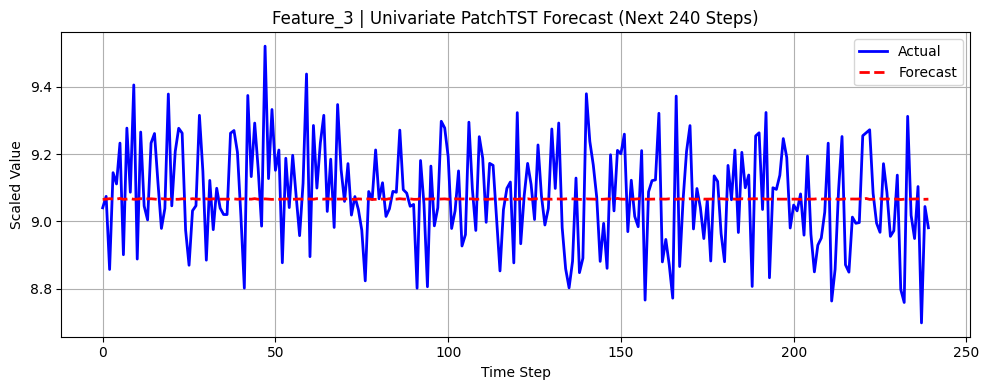


✅ Forecasted Values:
Step 001: 9.065332
Step 002: 9.066127
Step 003: 9.067483
Step 004: 9.066325
Step 005: 9.066264
Step 006: 9.068179
Step 007: 9.065499
Step 008: 9.066268
Step 009: 9.067626
Step 010: 9.065709
Step 011: 9.066105
Step 012: 9.067537
Step 013: 9.066295
Step 014: 9.066943
Step 015: 9.067149
Step 016: 9.066386
Step 017: 9.065126
Step 018: 9.067110
Step 019: 9.066678
Step 020: 9.065548
Step 021: 9.067066
Step 022: 9.065665
Step 023: 9.065745
Step 024: 9.067084
Step 025: 9.066606
Step 026: 9.065710
Step 027: 9.067445
Step 028: 9.066274
Step 029: 9.065916
Step 030: 9.066505
Step 031: 9.067077
Step 032: 9.065248
Step 033: 9.067170
Step 034: 9.066019
Step 035: 9.066006
Step 036: 9.065696
Step 037: 9.066167
Step 038: 9.066214
Step 039: 9.066839
Step 040: 9.065855
Step 041: 9.066415
Step 042: 9.067225
Step 043: 9.066319
Step 044: 9.066061
Step 045: 9.067616
Step 046: 9.065731
Step 047: 9.066270
Step 048: 9.066871
Step 049: 9.066140
Step 050: 9.065376
Step 051: 9.066157
Step 052:

In [ ]:
# 📈 Plot Forecast vs Actual
plt.figure(figsize=(10, 4))
plt.plot(y_orig, label='Actual', color='blue', linewidth=2)
plt.plot(forecast_orig, label='Forecast', color='red', linestyle='--', linewidth=2)
plt.title(f"Feature_{feature_idx} | Univariate PatchTST Forecast (Next {horizon} Steps)")
plt.xlabel("Time Step")
plt.ylabel("Scaled Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 🧾 Optional: Print Forecasted Values
print("\n✅ Forecasted Values:")
for i, val in enumerate(forecast_orig.flatten(), 1):
    print(f"Step {i:03d}: {val:.6f}")


### **Actual Vs Forecasted Horizon Plots - Tolerance Band Logic 1**

✅ Feature_3: Computed tolerance band ±0.0878


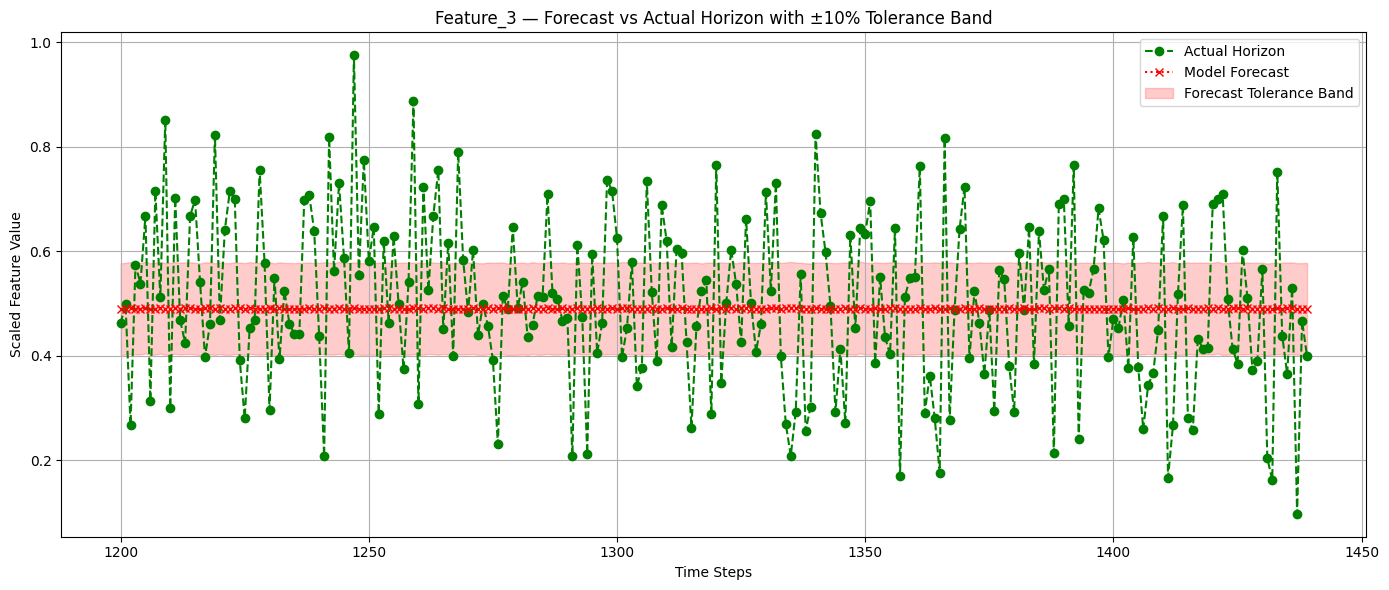


=== Feature_3 — Last Test Window: Actual vs Forecasted ===




In [ ]:
# Ensure variables exist from evaluation stage:
# X_last, y_last, forecast, lookback, horizon, feature_idx

# Flatten arrays for simplicity
X_feature = X_last.flatten()
y_feature = y_last[:horizon].flatten()
forecast_feature = forecast.flatten()

# Compute Tolerance Band (±10% of actual range)
lowest_actual = np.min(y_feature)
highest_actual = np.max(y_feature)
band_half = (highest_actual - lowest_actual) / 10
band_lower = forecast_feature - band_half
band_upper = forecast_feature + band_half

print(f"✅ Feature_{feature_idx}: Computed tolerance band ±{band_half:.4f}")

# Plot: Past, Actual, Forecast, and Tolerance Band
plt.figure(figsize=(14, 6))

# # Lookback (past input sequence)
# plt.plot(
#     np.arange(lookback),
#     X_feature,
#     label=f"Feature_{feature_idx} Lookback (Past {lookback} timesteps)",
#     color="blue",
# )

# Actual future (ground truth)
plt.plot(
    np.arange(lookback, lookback + horizon),
    y_feature,
    color="green",
    linestyle="--",
    marker="o",
    label="Actual Horizon",
)

# Model forecast
plt.plot(
    np.arange(lookback, lookback + len(forecast_feature)),
    forecast_feature,
    color="red",
    linestyle=":",
    marker="x",
    label="Model Forecast",
)

# Shaded tolerance band
plt.fill_between(
    np.arange(lookback, lookback + len(forecast_feature)),
    band_lower,
    band_upper,
    color='red',
    alpha=0.2,
    label="Forecast Tolerance Band"
)

plt.xlabel("Time Steps")
plt.ylabel("Scaled Feature Value")
plt.title(f"Feature_{feature_idx} — Forecast vs Actual Horizon with ±10% Tolerance Band")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print Actual vs Forecasted Values
print(f"\n=== Feature_{feature_idx} — Last Test Window: Actual vs Forecasted ===")
# for i in range(min(len(forecast_feature), len(y_feature))):
    # print(f"Step {i+1:03d}: Actual = {y_feature[i]:.6f}, Forecasted = {forecast_feature[i]:.6f}")

print("\n" + "=" * 80 + "\n")


### **Actual Vs Forecasted Horizon Plots - Tolerance Band Logic 2**

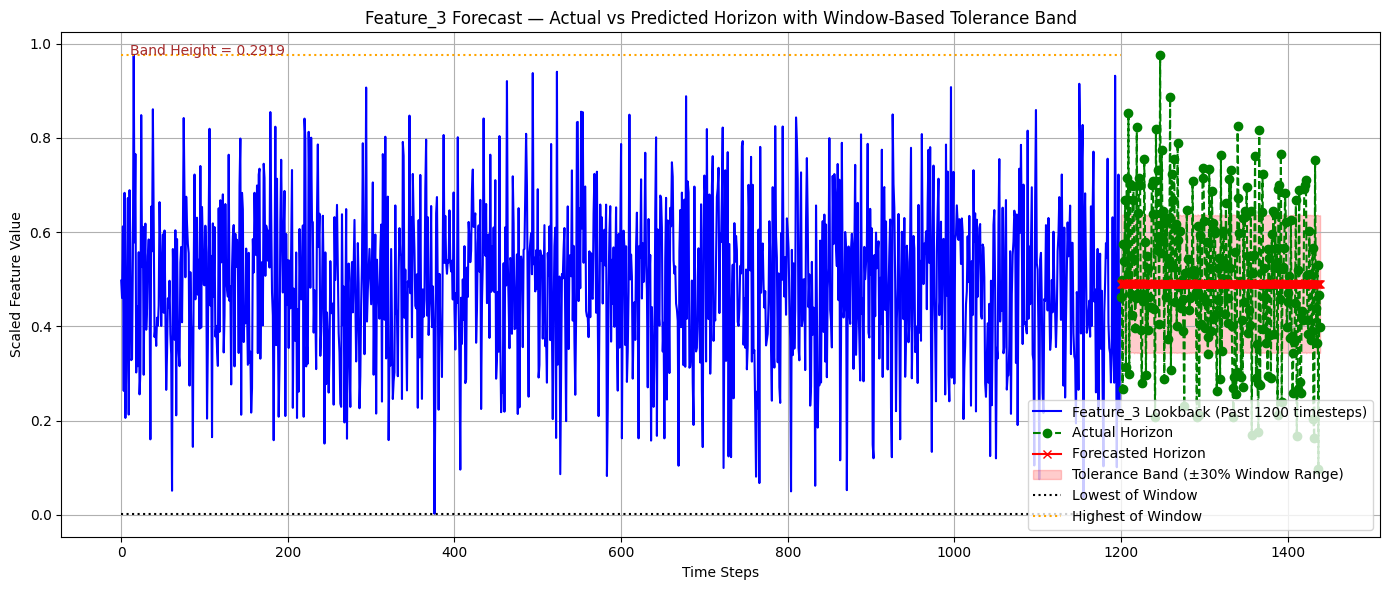

✅ Tolerance Accuracy: 60.83%


In [ ]:
# Univariate PatchTST — Forecast Visualization with Tolerance Band

import numpy as np
import matplotlib.pyplot as plt

# Ensure your variables are ready:
# X_last → (lookback, 1)
# y_last → (horizon, 1)
# forecast → (horizon,)
# feature_idx → int

# Flatten to 1D for convenience
X_feature = X_last.squeeze()          # shape (lookback,)
y_feature = y_last.squeeze()          # shape (horizon,)
forecast_feature = forecast.squeeze() # shape (horizon,)

# Compute tolerance band (window dynamics)
lowest_mean = np.min(X_feature)
highest_mean = np.max(X_feature)
band_height = 0.30 * (highest_mean - lowest_mean)  # 30% of window range
band_half = band_height / 2

# Plot the forecast visualization
plt.figure(figsize=(14, 6))

# Lookback (past)
plt.plot(
    np.arange(lookback),
    X_feature,
    color='blue',
    label=f'Feature_{feature_idx} Lookback (Past {lookback} timesteps)'
)

# Actual future
plt.plot(
    np.arange(lookback, lookback + horizon),
    y_feature,
    color='green',
    linestyle='--',
    marker='o',
    label='Actual Horizon'
)

# Forecasted future
plt.plot(
    np.arange(lookback, lookback + len(forecast_feature)),
    forecast_feature,
    color='red',
    linestyle='-',
    marker='x',
    label='Forecasted Horizon'
)

# Tolerance band (±band_half)
band_lower = forecast_feature - band_half
band_upper = forecast_feature + band_half
plt.fill_between(
    np.arange(lookback, lookback + len(forecast_feature)),
    band_lower,
    band_upper,
    color='red',
    alpha=0.2,
    label='Tolerance Band (±30% Window Range)'
)

# Window min/max reference lines
plt.hlines(lowest_mean, 0, lookback, colors='black', linestyles='dotted', label='Lowest of Window')
plt.hlines(highest_mean, 0, lookback, colors='orange', linestyles='dotted', label='Highest of Window')

# Annotate band height
plt.text(10, highest_mean, f'Band Height = {band_height:.4f}', fontsize=10, color='brown')

# Labels and formatting
plt.xlabel("Time Steps")
plt.ylabel("Scaled Feature Value")
plt.title(f"Feature_{feature_idx} Forecast — Actual vs Predicted Horizon with Window-Based Tolerance Band")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

within_band = np.logical_and(y_feature >= band_lower, y_feature <= band_upper)
tolerance_accuracy = np.mean(within_band) * 100
print(f"✅ Tolerance Accuracy: {tolerance_accuracy:.2f}%")


### **Performance Analysis**

In [ ]:
import numpy as np

# Univariate PatchTST — Practical Forecast Evaluation

# Flatten arrays for convenience
y_feature = y_last[:horizon].squeeze()
forecast_feature = forecast.squeeze()

# Inverse transform to original scale
feature_min = scaler.min_[feature_idx]
feature_scale = scaler.scale_[feature_idx]
y_orig = y_feature.reshape(-1, 1) * (1 / feature_scale) - (feature_min / feature_scale)
forecast_orig = forecast_feature.reshape(-1, 1) * (1 / feature_scale) - (feature_min / feature_scale)
y_orig = y_orig.flatten()
forecast_orig = forecast_orig.flatten()

# Compute tolerance band (10% of value range)
lowest_actual = np.min(y_orig)
highest_actual = np.max(y_orig)
band_half = (highest_actual - lowest_actual) / 10

# Smooth accuracy
accuracies = []
print(f"\n=== Feature_{feature_idx} Forecast Performance ===")

for i in range(len(forecast_orig)):
    error = abs(y_orig[i] - forecast_orig[i])
    if error <= band_half:
        acc = 100 * (1 - (error / band_half))  # Linear decay
    else:
        acc = 0.0
    accuracies.append(acc)
    print(f"Step {i+1:03d}: Actual = {y_orig[i]:.4f}, Forecasted = {forecast_orig[i]:.4f}, "
          f"Error = {error:.4f}, Accuracy = {acc:.2f}%")

# Compute overall metrics
overall_acc = np.mean(accuracies)
nonzero_mask = y_orig != 0
mape = np.mean(np.abs((y_orig[nonzero_mask] - forecast_orig[nonzero_mask]) / y_orig[nonzero_mask])) * 100 if np.any(nonzero_mask) else np.nan
rmse = np.sqrt(np.mean((y_orig - forecast_orig) ** 2))

# Display results
print("\n" + "=" * 80)
print(f"✅ Overall Smooth Forecast Accuracy (Tol ±{band_half:.4f}): {overall_acc:.2f}%")
print(f"📉 MAPE: {mape:.4f}%")
print(f"📊 RMSE: {rmse:.4f}")
print("=" * 80)



=== Feature_3 Forecast Performance ===
Step 001: Actual = 9.0403, Forecasted = 9.0653, Error = 0.0250, Accuracy = 69.60%
Step 002: Actual = 9.0744, Forecasted = 9.0661, Error = 0.0082, Accuracy = 89.99%
Step 003: Actual = 8.8572, Forecasted = 9.0675, Error = 0.2103, Accuracy = 0.00%
Step 004: Actual = 9.1447, Forecasted = 9.0663, Error = 0.0784, Accuracy = 4.64%
Step 005: Actual = 9.1113, Forecasted = 9.0663, Error = 0.0450, Accuracy = 45.22%
Step 006: Actual = 9.2326, Forecasted = 9.0682, Error = 0.1644, Accuracy = 0.00%
Step 007: Actual = 8.9010, Forecasted = 9.0655, Error = 0.1645, Accuracy = 0.00%
Step 008: Actual = 9.2771, Forecasted = 9.0663, Error = 0.2109, Accuracy = 0.00%
Step 009: Actual = 9.0867, Forecasted = 9.0676, Error = 0.0191, Accuracy = 76.81%
Step 010: Actual = 9.4054, Forecasted = 9.0657, Error = 0.3397, Accuracy = 0.00%
Step 011: Actual = 8.8881, Forecasted = 9.0661, Error = 0.1780, Accuracy = 0.00%
Step 012: Actual = 9.2654, Forecasted = 9.0675, Error = 0.1979, A

### **Performance Accuracy Analysis**

In [ ]:
import numpy as np

# Univariate PatchTST — Window Tolerance Band Accuracy

# Extract the single feature data (since the model is univariate)
X_feature = X_last.squeeze()              # Shape: (lookback,)
y_feature = y_last[:horizon].squeeze()    # Shape: (horizon,)
forecast_feature = forecast.squeeze()     # Shape: (horizon,)

# Compute tolerance band (window dynamics)
lowest_mean = np.min(X_feature)
highest_mean = np.max(X_feature)
band_height = 0.30 * (highest_mean - lowest_mean)  # 30% of window range
band_half = band_height / 2

# Calculate upper and lower tolerance bounds around forecast
band_lower = forecast_feature - band_half
band_upper = forecast_feature + band_half

# Check which actual horizon values lie within the tolerance band
within_band = (y_feature >= band_lower) & (y_feature <= band_upper)

# Compute accuracy as the percentage of forecasted values within the band
accuracy_percentage = np.sum(within_band) / len(y_feature) * 100.0

# Display results
print("=" * 80)
print(f"✅ Univariate Feature Forecast Accuracy (Window TolBand): {accuracy_percentage:.2f}% "
      f"of horizon values within the forecasted tolerance band")
print(f"📊 Tolerance Band Height: {band_height:.4f}")
print(f"📉 Value Range (Window): [{lowest_mean:.4f}, {highest_mean:.4f}]")
print("=" * 80)


✅ Univariate Feature Forecast Accuracy (Window TolBand): 60.83% of horizon values within the forecasted tolerance band
📊 Tolerance Band Height: 0.2919
📉 Value Range (Window): [0.0021, 0.9751]


# **NEXT**

In [ ]:
# config = PatchTSTConfig(
#     context_length=1200,
#     prediction_length=240,
#     num_attention_heads=2,
#     num_input_channels=4,
#     num_hidden_layers=3,
#     patch_length=12,
#     patch_stride=3,
#     d_model=256,
#     ffn_dim=512,
#     dropout=0.1,
#     activation_function='gelu'
# )
# model = PatchTSTForPrediction(config)
# batch_size=32
# ✅ Feature_0 Accuracy (Window TolBand): 96.25% of horizon values within forecasted tolerance band
# ✅ Feature_1 Accuracy (Window TolBand): 89.17% of horizon values within forecasted tolerance band
# ✅ Feature_2 Accuracy (Window TolBand): 76.67% of horizon values within forecasted tolerance band
# ✅ Feature_3 Accuracy (Window TolBand): 61.67% of horizon values within forecasted tolerance band


# config = PatchTSTConfig(
#     context_length=1200,
#     prediction_length=240,
#     num_attention_heads=2,
#     num_input_channels=4,
#     num_hidden_layers=2,
#     patch_length=12,
#     patch_stride=3,
#     d_model=256,
#     ffn_dim=512,
#     dropout=0.1,
#     # activation_function='gelu'
# )
# model = PatchTSTForPrediction(config)
# batch_size=32
# ✅ Feature_0 Accuracy (Window TolBand): 96.67% of horizon values within forecasted tolerance band
# ✅ Feature_1 Accuracy (Window TolBand): 91.25% of horizon values within forecasted tolerance band
# ✅ Feature_2 Accuracy (Window TolBand): 76.67% of horizon values within forecasted tolerance band
# ✅ Feature_3 Accuracy (Window TolBand): 60.83% of horizon values within forecasted tolerance band



